In [56]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import datetime
import wordcloud
import json

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.filterwarnings('ignore')

In [3]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [4]:
df = pd.read_csv("/home/sleepynav/Documents/Social Web/Youtube-Trending/Data/USvideos.csv", index_col='video_id')

with open("/home/sleepynav/Documents/Social Web/Youtube-Trending/Data/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
counts_titles = {}

for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

In [5]:
df.head(2)

trending_date                                              title  \
video_id                                                                       
2kyS6SvSYSE      17.14.11                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1ZAPwfrtAFY      17.14.11  The Trump Presidency: Last Week Tonight with J...   

               channel_title  category_id              publish_time  \
video_id                                                              
2kyS6SvSYSE     CaseyNeistat           22  2017-11-13T17:13:01.000Z   
1ZAPwfrtAFY  LastWeekTonight           24  2017-11-13T07:30:00.000Z   

                                                          tags    views  \
video_id                                                                  
2kyS6SvSYSE                                    SHANtell martin   748374   
1ZAPwfrtAFY  last week tonight trump presidency|"last week ...  2418783   

             likes  dislikes  comment_count  \
video_id                                      
2kyS6SvSYSE  57527      2966          15954   
1ZAPwfrtAFY  97185      6146          12703   

                                             thumbnail_link  \
video_id                                                      
2kyS6SvSYSE  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1ZAPwfrtAFY  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   

             comments_disabled  ratings_disabled  video_error_or_removed  \
video_id                                                                   
2kyS6SvSYSE              False             False                   False   
1ZAPwfrtAFY              False             False                   False   

                                                   description   category_name  
video_id                                                                        
2kyS6SvSYSE  SHANTELL'S CHANNEL - https://www.youtube.com/s...  People & Blogs  
1ZAPwfrtAFY  One year after the presidential election, John...   Entertainment

In [6]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40949 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 16 columns):
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
category_name             40949 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.5+ MB


In [8]:
df[df["description"].apply(lambda x: pd.isnull(x))].head(1)

trending_date                                              title  \
video_id                                                                       
NZFhMSgbKKM      17.14.11  Dennis Smith Jr. and LeBron James go back and ...   

            channel_title  category_id              publish_time    tags  \
video_id                                                                   
NZFhMSgbKKM  Ben Rohrbach           17  2017-11-13T15:11:00.000Z  [none]   

             views  likes  dislikes  comment_count  \
video_id                                             
NZFhMSgbKKM    945      7         5              8   

                                             thumbnail_link  \
video_id                                                      
NZFhMSgbKKM  https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg   

             comments_disabled  ratings_disabled  video_error_or_removed  \
video_id                                                                   
NZFhMSgbKKM              False             False                   False   

            description category_name  
video_id                               
NZFhMSgbKKM         NaN        Sports

In [9]:
df["description"] = df["description"].fillna(value="")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40949 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 16 columns):
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40949 non-null object
category_name             40949 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.5+ MB


In [10]:
df[['category_id', 'category_name']].head(2)

category_id   category_name
video_id                                
2kyS6SvSYSE           22  People & Blogs
1ZAPwfrtAFY           24   Entertainment

In [11]:
category_count = df['category_name'].value_counts() # frequency for each category
category_count

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category_name, dtype: int64

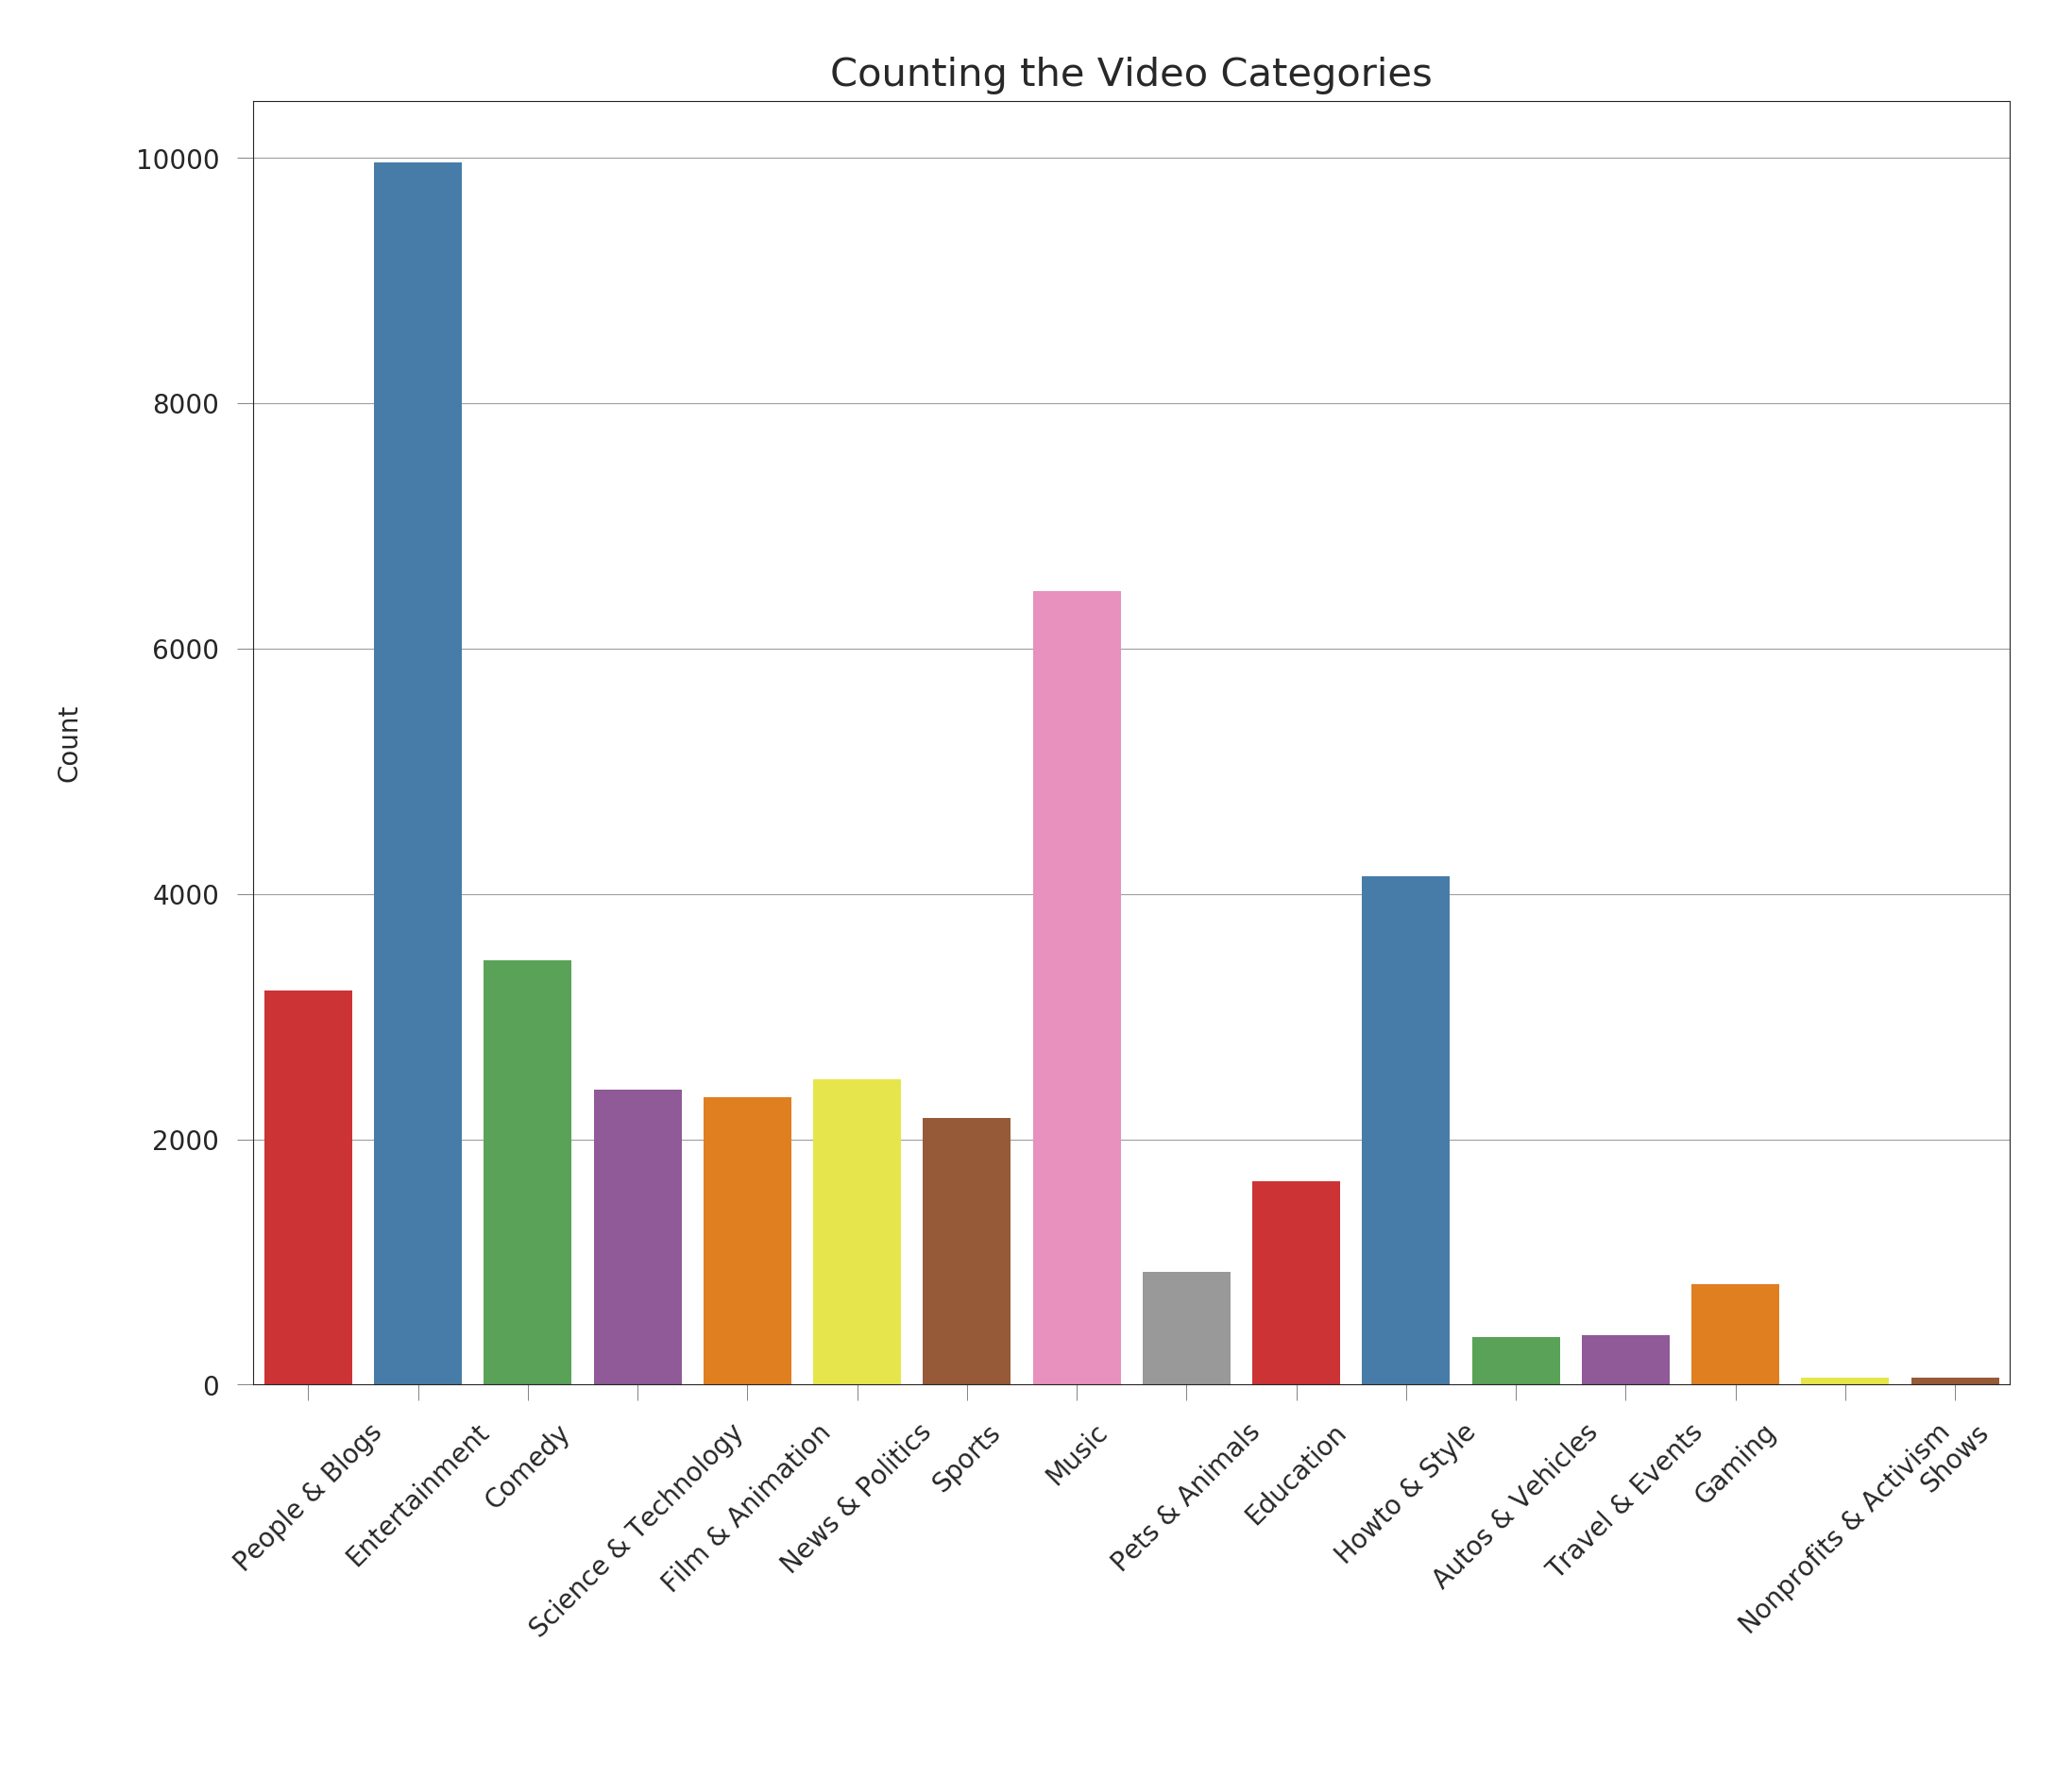

In [12]:
plt.figure(figsize = (12,9))

g = sns.countplot('category_name', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Categories", fontsize=15)
g.set_xlabel(" ", fontsize=10)
g.set_ylabel("Count", fontsize=10);

In [13]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_date'].head(2)

video_id
2kyS6SvSYSE   2017-11-14
1ZAPwfrtAFY   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [14]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_time'].head()

video_id
2kyS6SvSYSE   2017-11-13 17:13:01
1ZAPwfrtAFY   2017-11-13 07:30:00
5qpjK5DgCt4   2017-11-12 19:05:24
puqaWrEC7tY   2017-11-13 11:00:04
d380meD0W0M   2017-11-12 18:01:41
Name: publish_time, dtype: datetime64[ns]

In [15]:
type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    df[column] = df[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    df[column] = df[column].astype(str)

In [16]:
df.describe()

views      likes   dislikes  comment_count
count     40949.00   40949.00   40949.00       40949.00
mean    2360784.64   74266.70    3711.40        8446.80
std     7394113.76  228885.34   29029.71       37430.49
min         549.00       0.00       0.00           0.00
25%      242329.00    5424.00     202.00         614.00
50%      681861.00   18091.00     631.00        1856.00
75%     1823157.00   55417.00    1938.00        5755.00
max   225211923.00 5613827.00 1674420.00     1361580.00

In [17]:
keep_columns = ['views', 'likes', 'dislikes', 'comment_count'] 
corr_matrix = df[keep_columns].corr()
corr_matrix

views  likes  dislikes  comment_count
views           1.00   0.85      0.47           0.62
likes           0.85   1.00      0.45           0.80
dislikes        0.47   0.45      1.00           0.70
comment_count   0.62   0.80      0.70           1.00

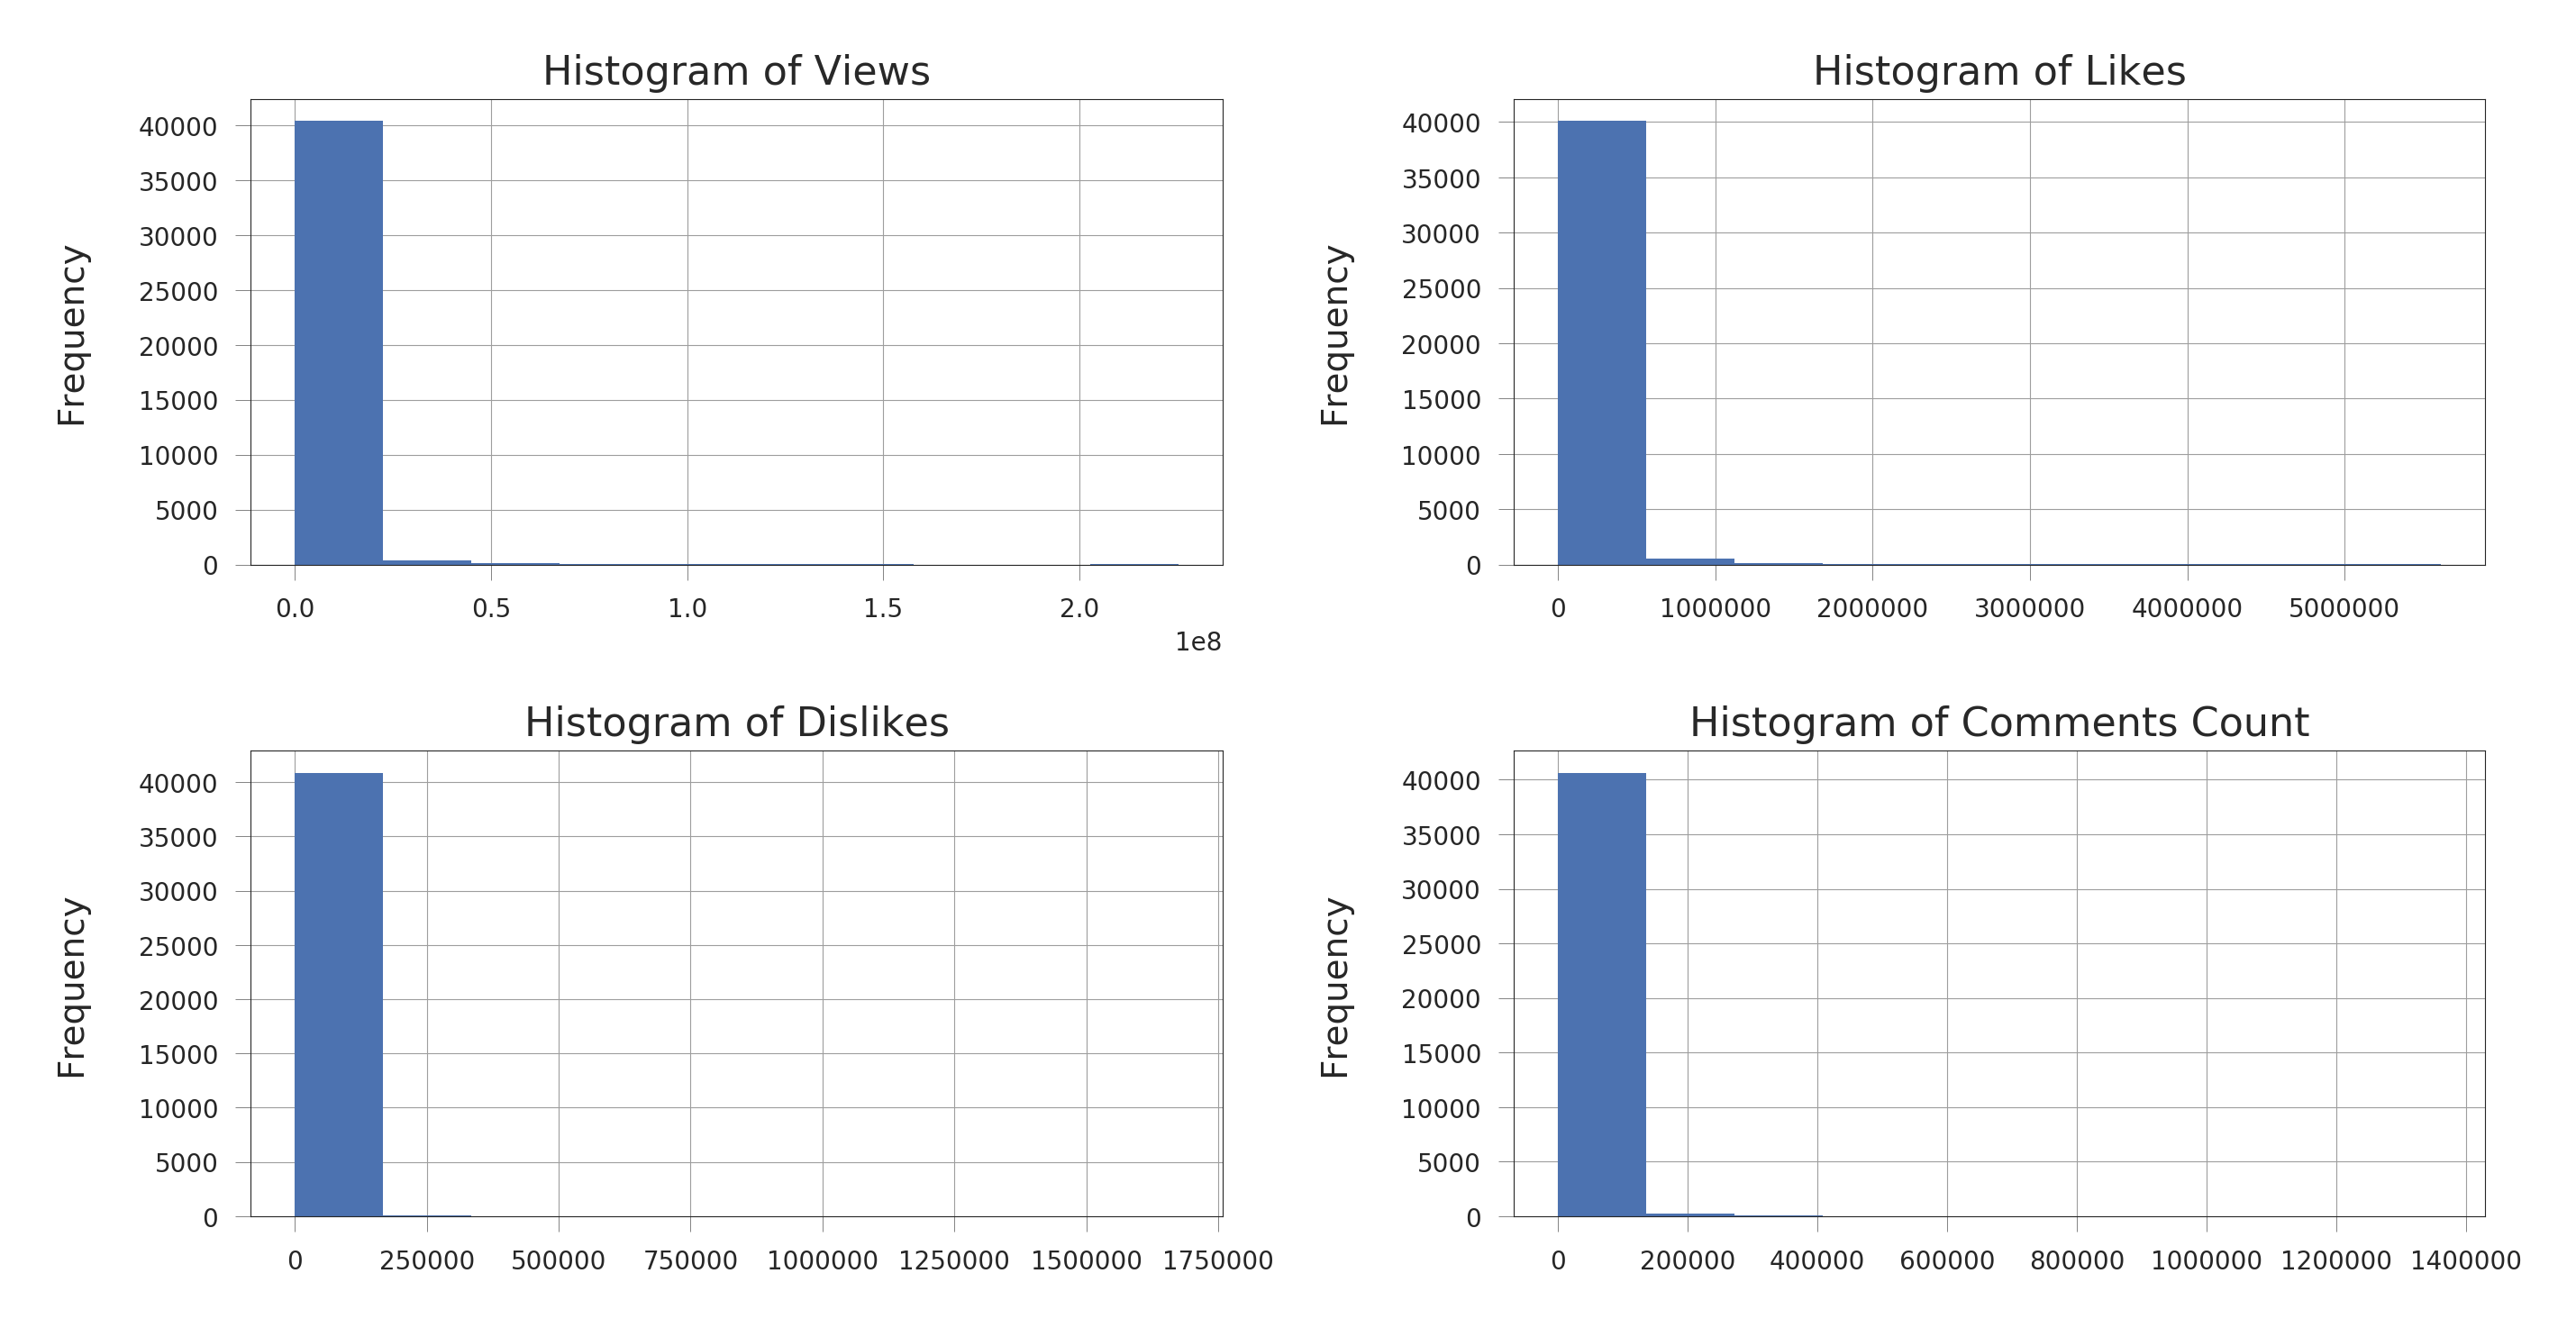

In [18]:
plt.figure(figsize = (16,8))

plt.subplot(221)
h1=df['views'].plot.hist()
h1.set_title("Histogram of Views", fontsize=16)

plt.subplot(222)
h2=df['likes'].plot.hist()
h2.set_title("Histogram of Likes", fontsize=16)

plt.subplot(223)
h3=df['dislikes'].plot.hist()
h3.set_title("Histogram of Dislikes", fontsize=16)

plt.subplot(224)
h4=df['comment_count'].plot.hist()
h4.set_title("Histogram of Comments Count", fontsize=16)


plt.subplots_adjust(wspace = 0.3, hspace = 0.4,top = 0.9)
plt.show();

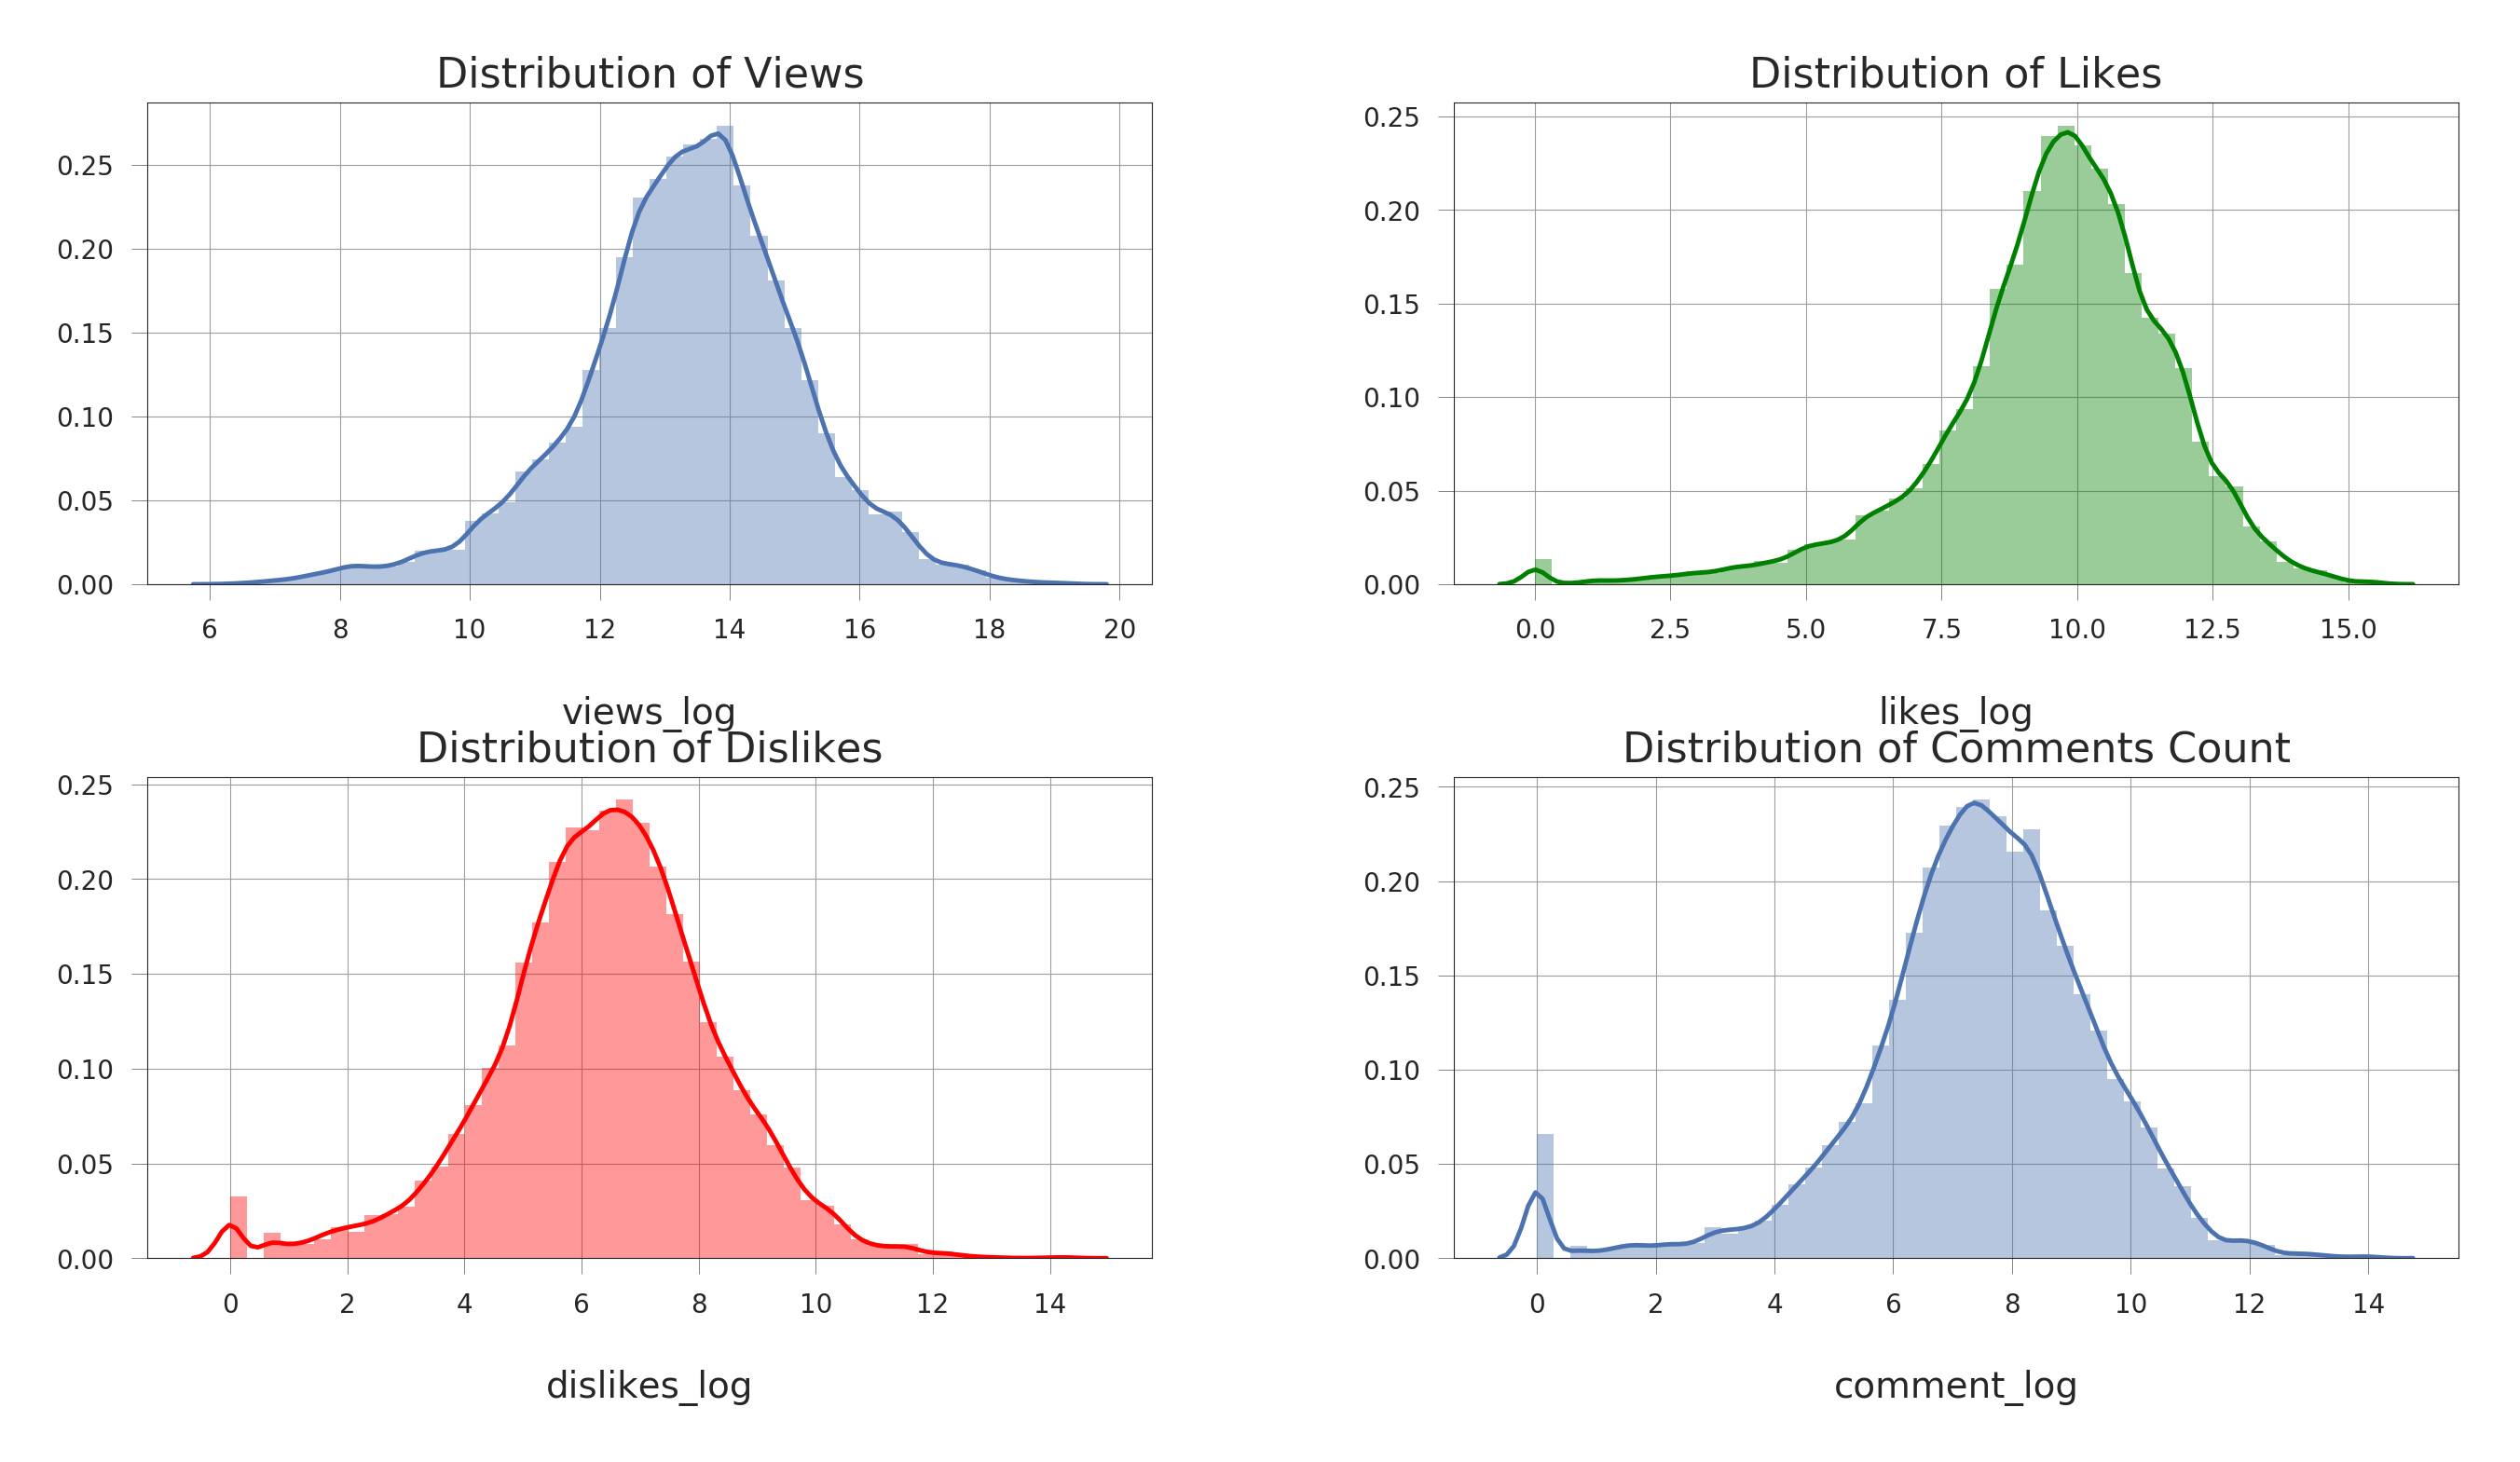

In [19]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

df['like_rate'] =  df['likes'] / df['views'] * 100
df['dislike_rate'] =  df['dislikes'] / df['views'] * 100
df['comment_rate'] =  df['comment_count'] / df['views'] * 100


plt.figure(figsize = (16,8))

plt.subplot(221)
l1 = sns.distplot(df['views_log'])
l1.set_title("Distribution of Views", fontsize=16)

plt.subplot(222)
l2 = sns.distplot(df['likes_log'],color='green')
l2.set_title('Distribution of Likes', fontsize=16)

plt.subplot(223)
l3 = sns.distplot(df['dislikes_log'], color='r')
l3.set_title("Distribution of Dislikes", fontsize=16)

plt.subplot(224)
l4 = sns.distplot(df['comment_log'])
l4.set_title("Distribution of Comments Count", fontsize=16)


plt.subplots_adjust(wspace = 0.3, hspace = 0.4,top = 0.9)
plt.show();

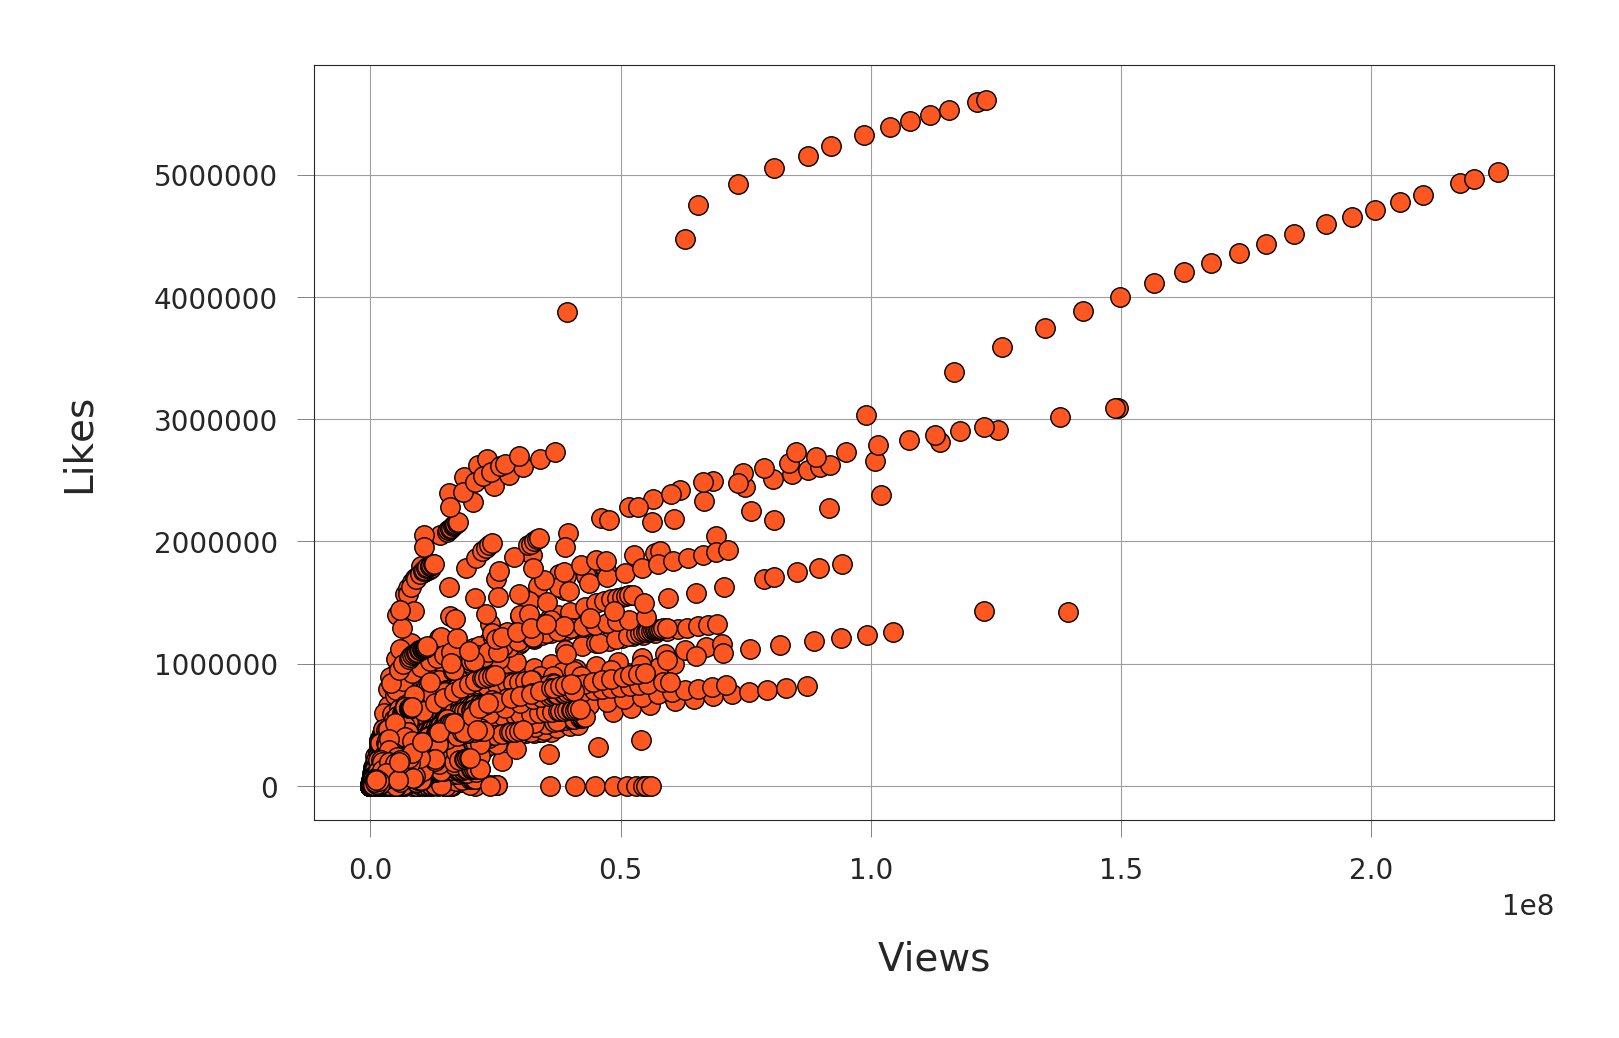

In [20]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Likes");

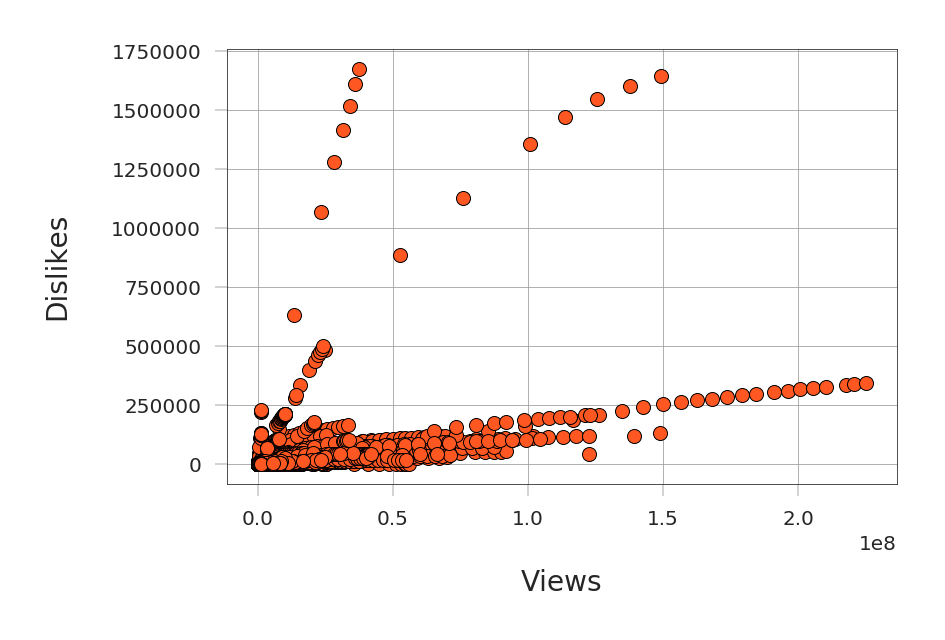

In [69]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['dislikes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Dislikes");

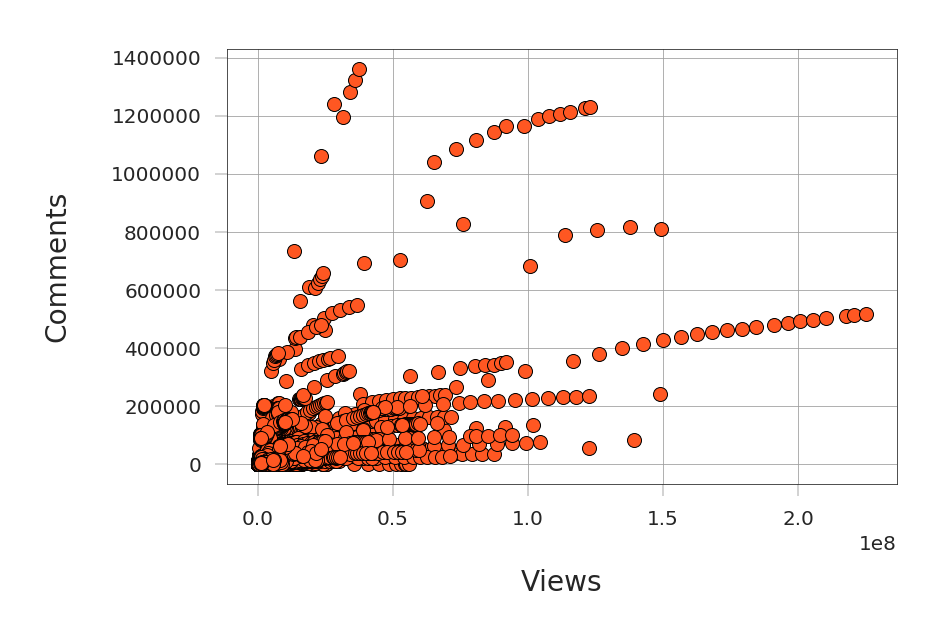

In [68]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['comment_count'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Comments");



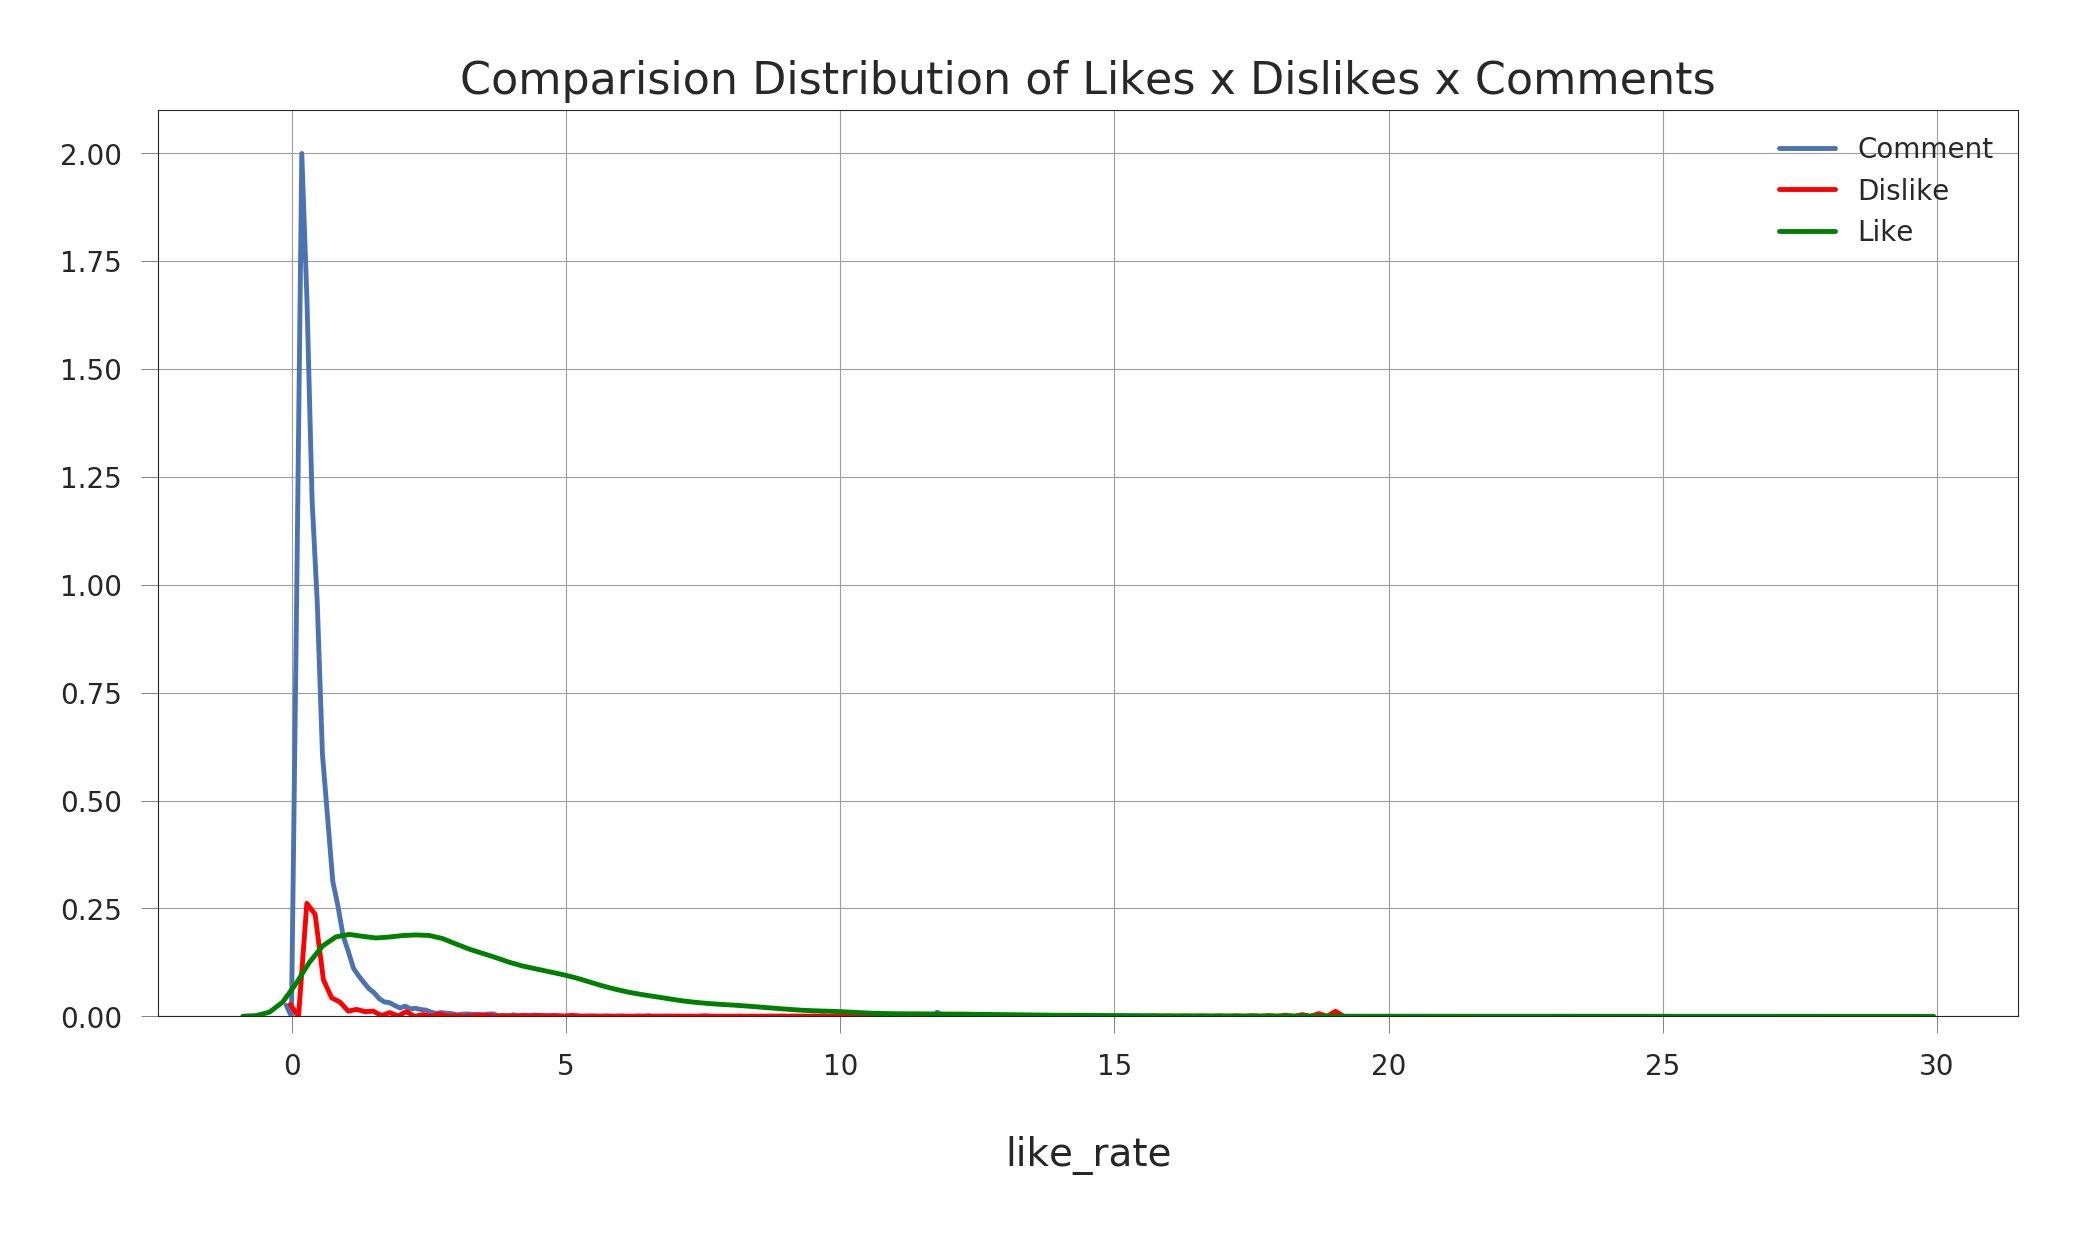

In [21]:
plt.figure(figsize=(12,6))
c1 = sns.distplot(df['comment_rate'],hist=False,label="Comment")
c1 = sns.distplot(df['dislike_rate'], color='red',hist=False, label="Dislike")
c1 = sns.distplot(df['like_rate'], color='green',hist=False, label="Like")

c1.set_title('Comparision Distribution of Likes x Dislikes x Comments', fontsize=16)
plt.legend()
plt.show();

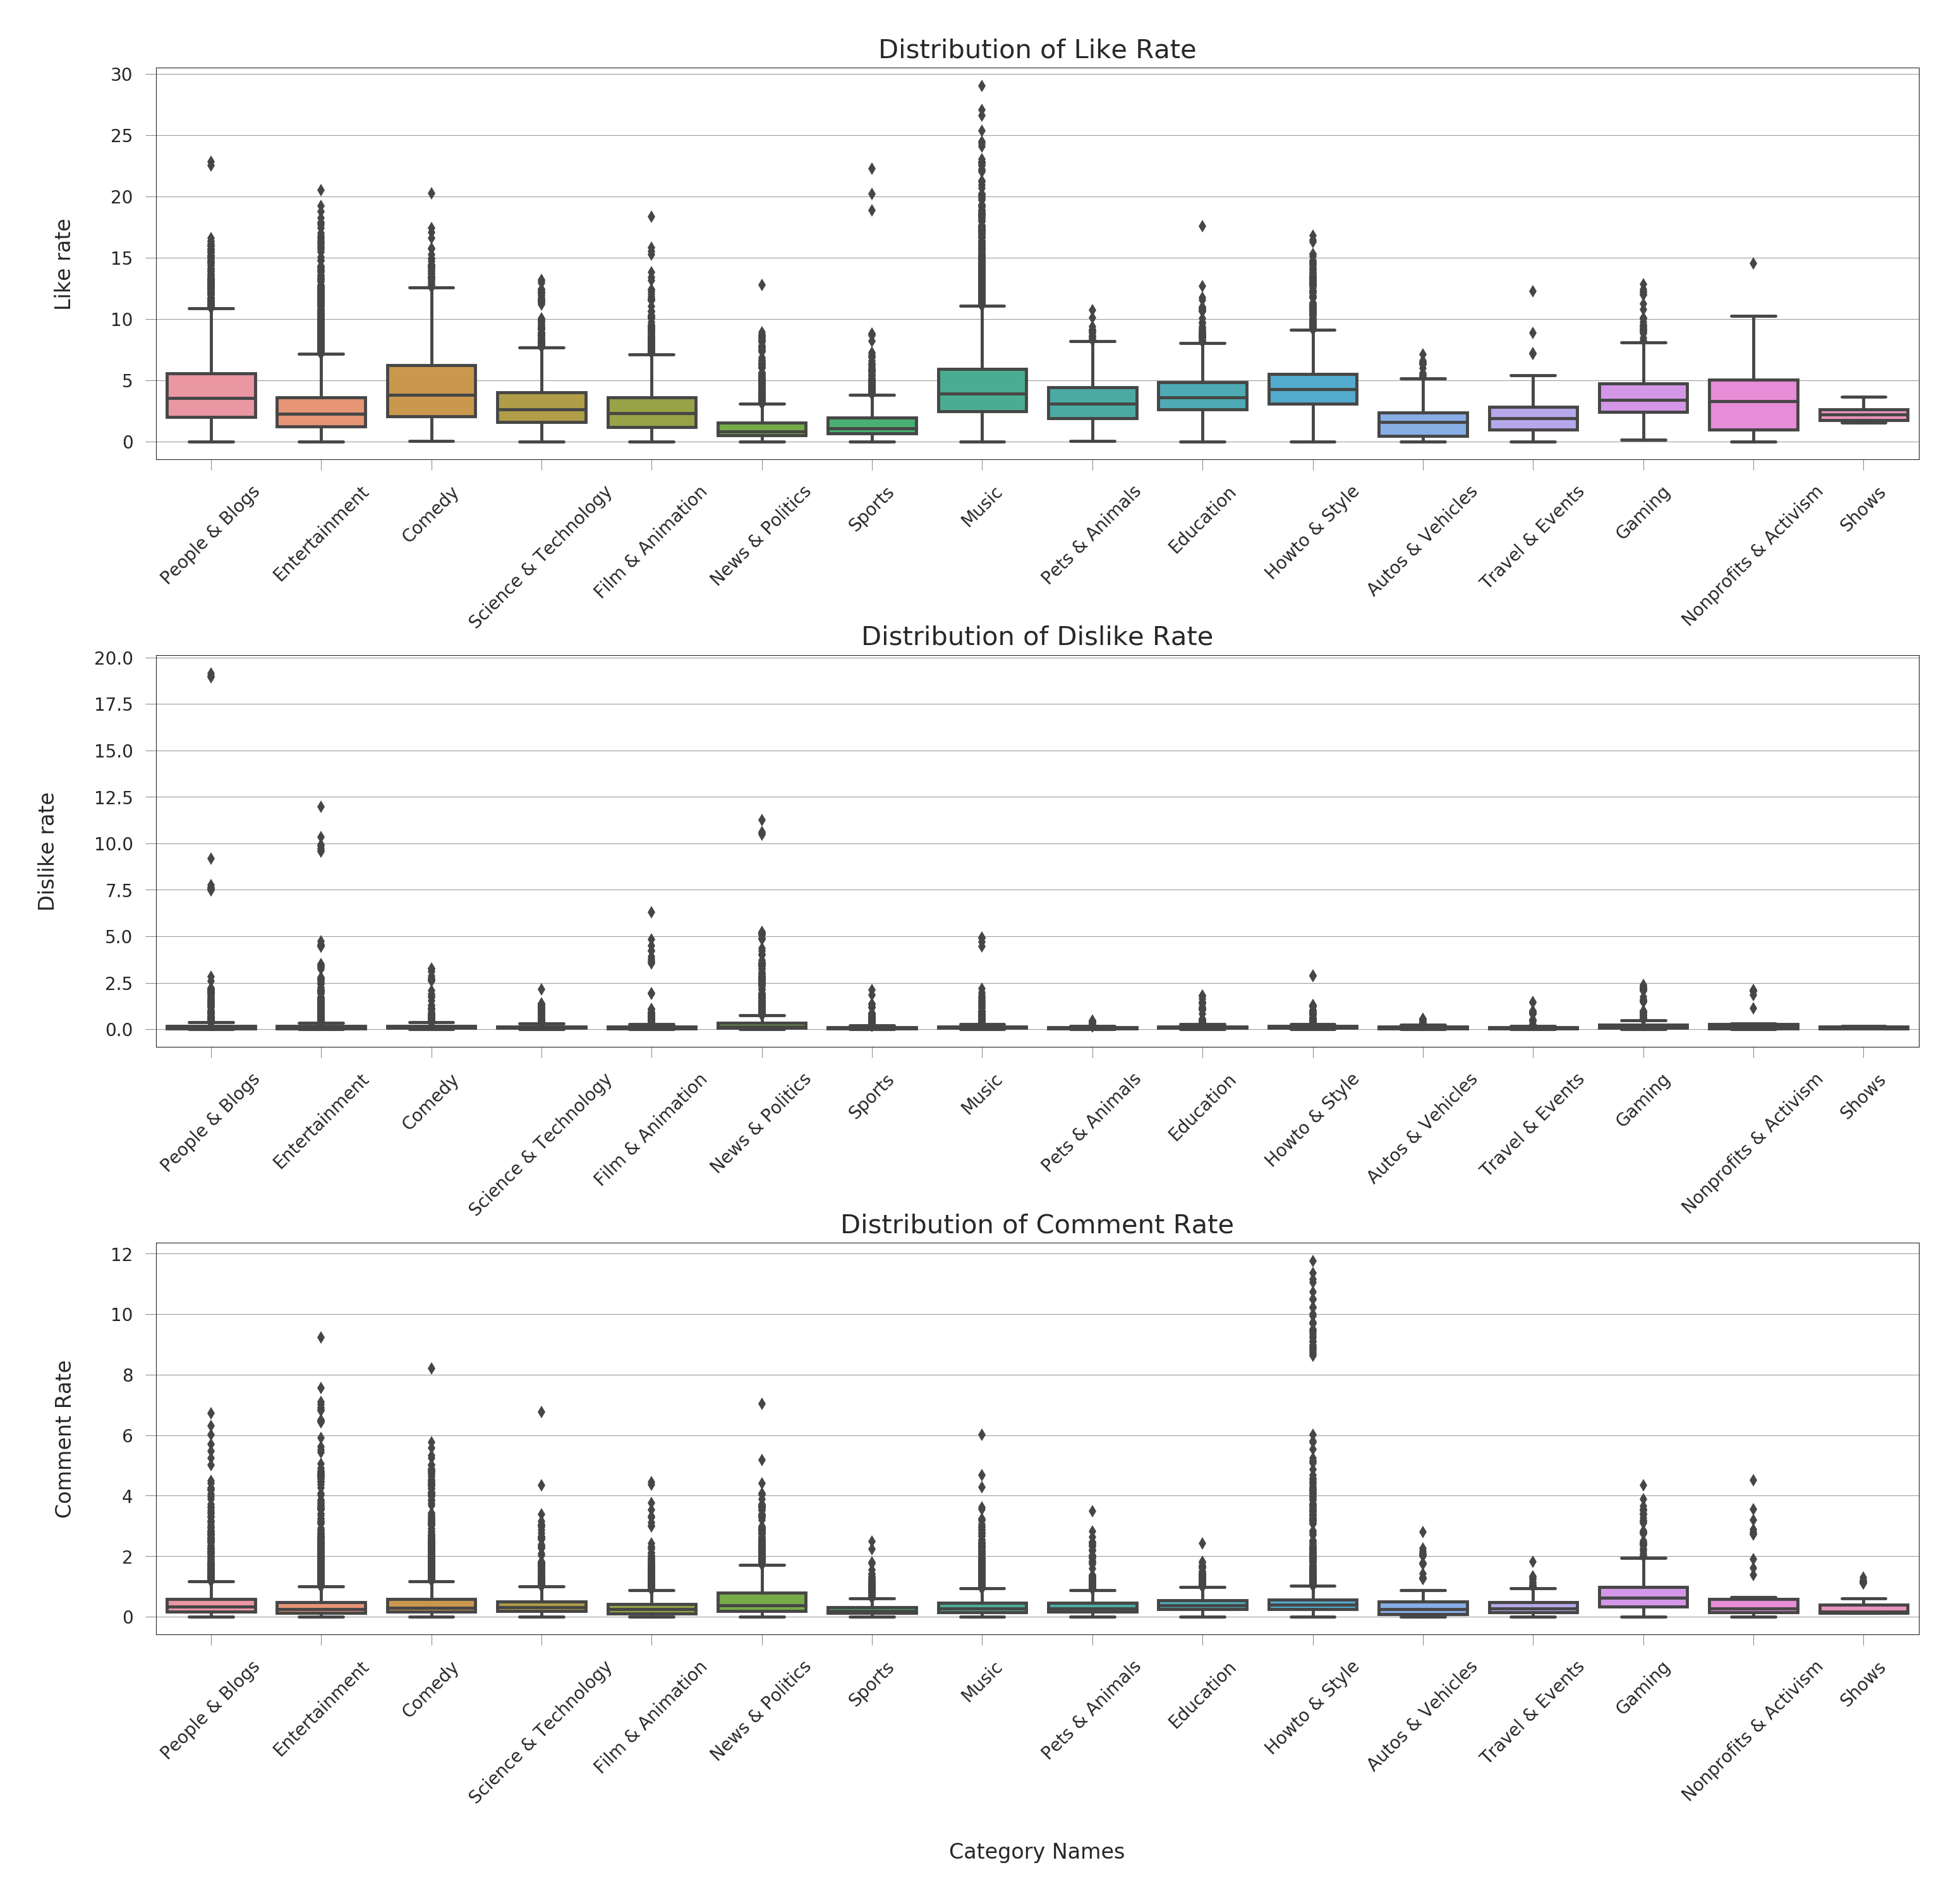

In [22]:
plt.figure(figsize=(18,16))

plt.subplot(311)
r1= sns.boxplot(x='category_name',y='like_rate',  data=df)
r1.set_xticklabels(g.get_xticklabels(),rotation=45)
r1.set_title("Distribution of Like Rate", fontsize=15)
r1.set_xlabel("", fontsize=12)
r1.set_ylabel("Like rate", fontsize=12)


plt.subplot(312)
r2= sns.boxplot(y='dislike_rate', x='category_name', data=df)
r2.set_xticklabels(g.get_xticklabels(),rotation=45)
r2.set_title("Distribution of Dislike Rate", fontsize=15)
r2.set_xlabel("", fontsize=12)
r2.set_ylabel("Dislike rate", fontsize=12)


plt.subplot(313)
r3= sns.boxplot(y='comment_rate', x='category_name', data=df)
r3.set_xticklabels(g.get_xticklabels(),rotation=45)
r3.set_title("Distribution of Comment Rate", fontsize=15)
r3.set_xlabel("Category Names", fontsize=12)
r3.set_ylabel("Comment Rate", fontsize=12)


plt.subplots_adjust(wspace = 0.5, hspace = 0.5,top = 0.9)
plt.show();

In [23]:
df.corr()

views  likes  dislikes  comment_count  \
views                    1.00   0.85      0.47           0.62   
likes                    0.85   1.00      0.45           0.80   
dislikes                 0.47   0.45      1.00           0.70   
comment_count            0.62   0.80      0.70           1.00   
comments_disabled        0.00  -0.03     -0.00          -0.03   
ratings_disabled         0.02  -0.02     -0.01          -0.01   
video_error_or_removed  -0.00  -0.00     -0.00          -0.00   
likes_log                0.39   0.46      0.18           0.31   
views_log                0.49   0.47      0.21           0.32   
dislikes_log             0.43   0.44      0.26           0.34   
comment_log              0.36   0.43      0.20           0.36   
like_rate               -0.03   0.18     -0.00           0.13   
dislike_rate            -0.00   0.01      0.26           0.13   
comment_rate            -0.05   0.07      0.09           0.25   

                        comments_disabled  ratings_disabled  \
views                                0.00              0.02   
likes                               -0.03             -0.02   
dislikes                            -0.00             -0.01   
comment_count                       -0.03             -0.01   
comments_disabled                    1.00              0.32   
ratings_disabled                     0.32              1.00   
video_error_or_removed              -0.00             -0.00   
likes_log                           -0.15             -0.29   
views_log                           -0.02             -0.02   
dislikes_log                        -0.07             -0.21   
comment_log                         -0.45             -0.17   
like_rate                           -0.10             -0.08   
dislike_rate                         0.04             -0.03   
comment_rate                        -0.10             -0.03   

                        video_error_or_removed  likes_log  views_log  \
views                                    -0.00       0.39       0.49   
likes                                    -0.00       0.46       0.47   
dislikes                                 -0.00       0.18       0.21   
comment_count                            -0.00       0.31       0.32   
comments_disabled                        -0.00      -0.15      -0.02   
ratings_disabled                         -0.00      -0.29      -0.02   
video_error_or_removed                    1.00      -0.00      -0.00   
likes_log                                -0.00       1.00       0.85   
views_log                                -0.00       0.85       1.00   
dislikes_log                             -0.00       0.83       0.86   
comment_log                              -0.01       0.84       0.76   
like_rate                                -0.00       0.42       0.04   
dislike_rate                             -0.00      -0.04      -0.04   
comment_rate                             -0.00       0.09      -0.09   

                        dislikes_log  comment_log  like_rate  dislike_rate  \
views                           0.43         0.36      -0.03         -0.00   
likes                           0.44         0.43       0.18          0.01   
dislikes                        0.26         0.20      -0.00          0.26   
comment_count                   0.34         0.36       0.13          0.13   
comments_disabled              -0.07        -0.45      -0.10          0.04   
ratings_disabled               -0.21        -0.17      -0.08         -0.03   
video_error_or_removed         -0.00        -0.01      -0.00         -0.00   
likes_log                       0.83         0.84       0.42         -0.04   
views_log                       0.86         0.76       0.04         -0.04   
dislikes_log                    1.00         0.79       0.09          0.24   
comment_log                     0.79         1.00       0.33          0.07   
like_rate                       0.09         0.33       1.00         -0.03   
dislike

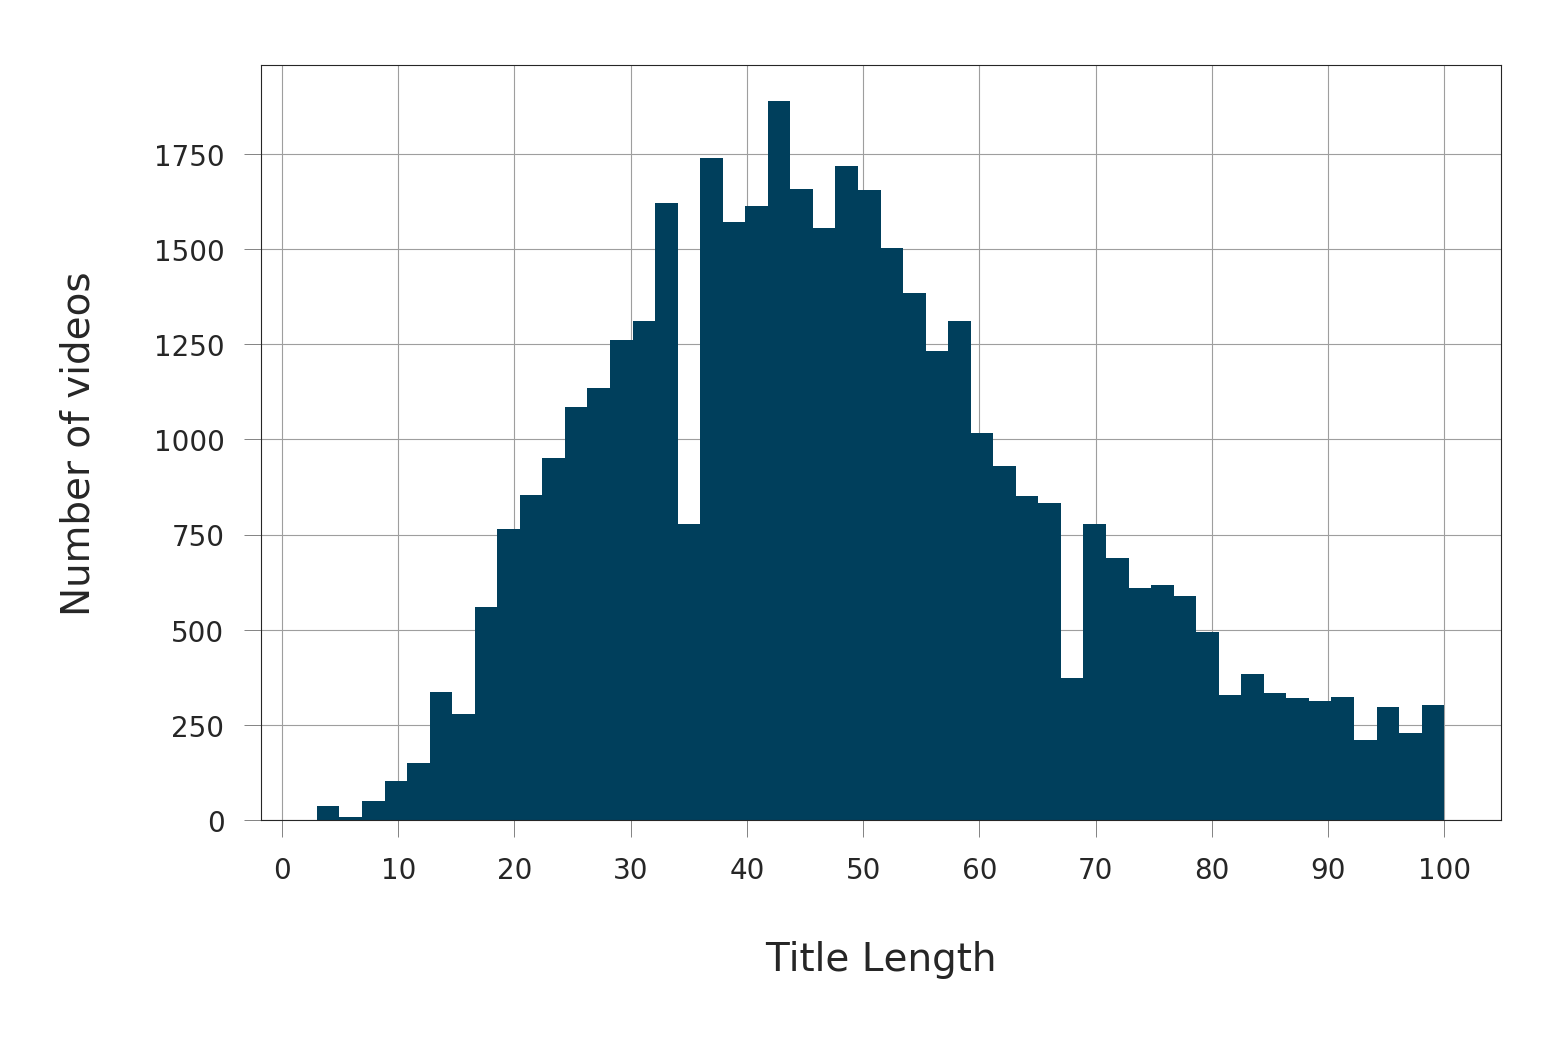

In [24]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
sns.distplot(df["title_length"], kde=False, rug=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
ax.set(xlabel="Title Length", ylabel="Number of videos", xticks=range(0, 110, 10));

In [26]:
df['title'].value_counts()

WE MADE OUR MOM CRY...HER DREAM CAME TRUE!                                              30
The ULTIMATE $30,000 Gaming PC Setup                                                    29
Charlie Puth - BOY [Official Audio]                                                     29
Why I'm So Scared (being myself and crying too much)                                    29
Rooster Teeth Animated Adventures - Millie So Serious                                   29
Sam Smith - Pray (Official Video) ft. Logic                                             29
YoungBoy Never Broke Again Goes Sneaker Shopping With Complex                           29
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures            29
FORTNITE The Movie (Official Fake Trailer)                                              28
Cobra Kai Season 2                                                                      28
The Deadliest Being on Planet Earth – The Bacteriophage                                 28

In [27]:
df['comments_disabled'].value_counts()

False    40316
True       633
Name: comments_disabled, dtype: int64

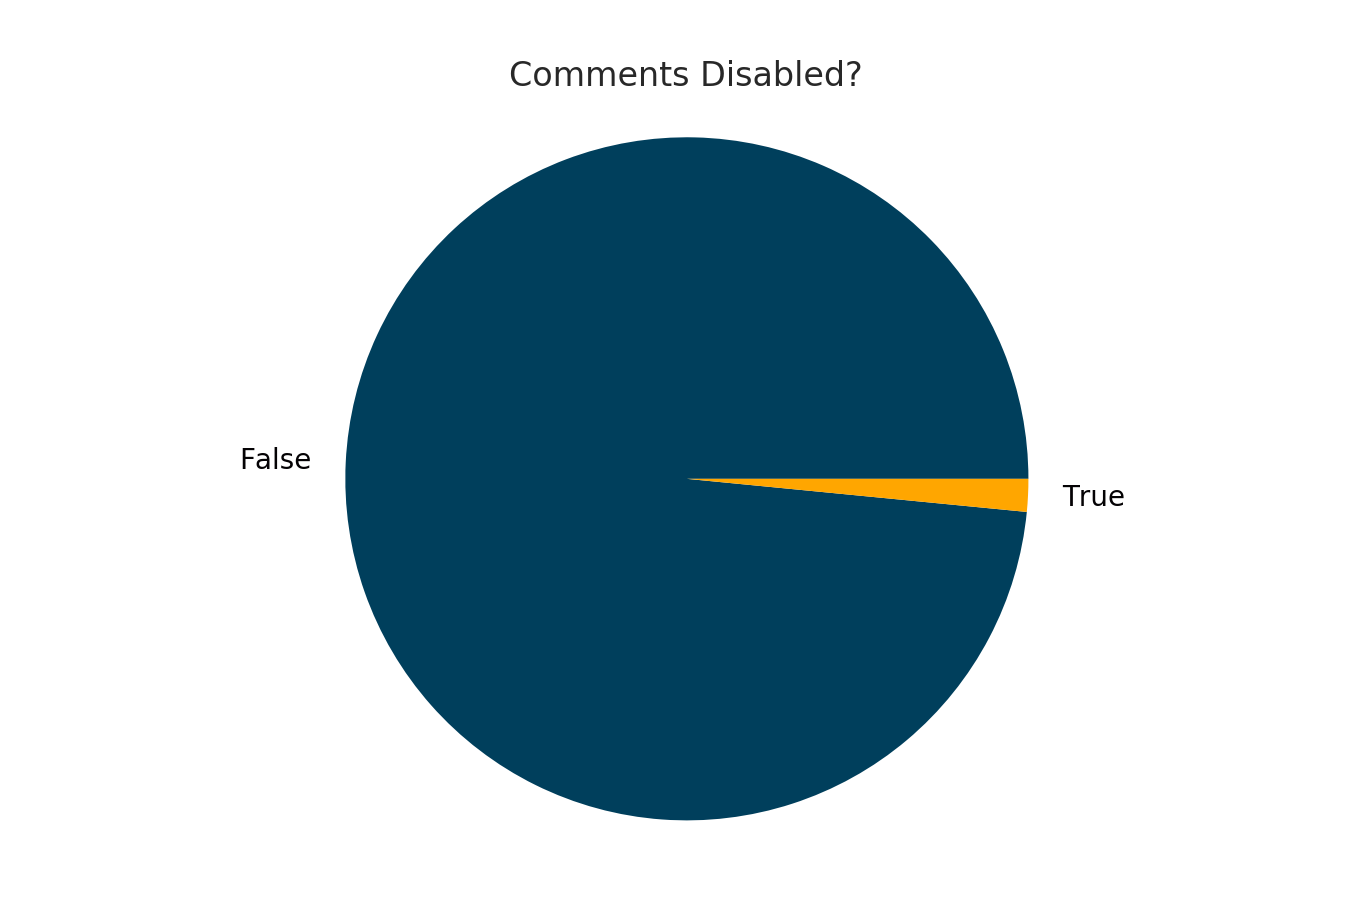

In [28]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie(x=[value_counts[False], value_counts[True]], labels=['False', 'True'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Comments Disabled?');

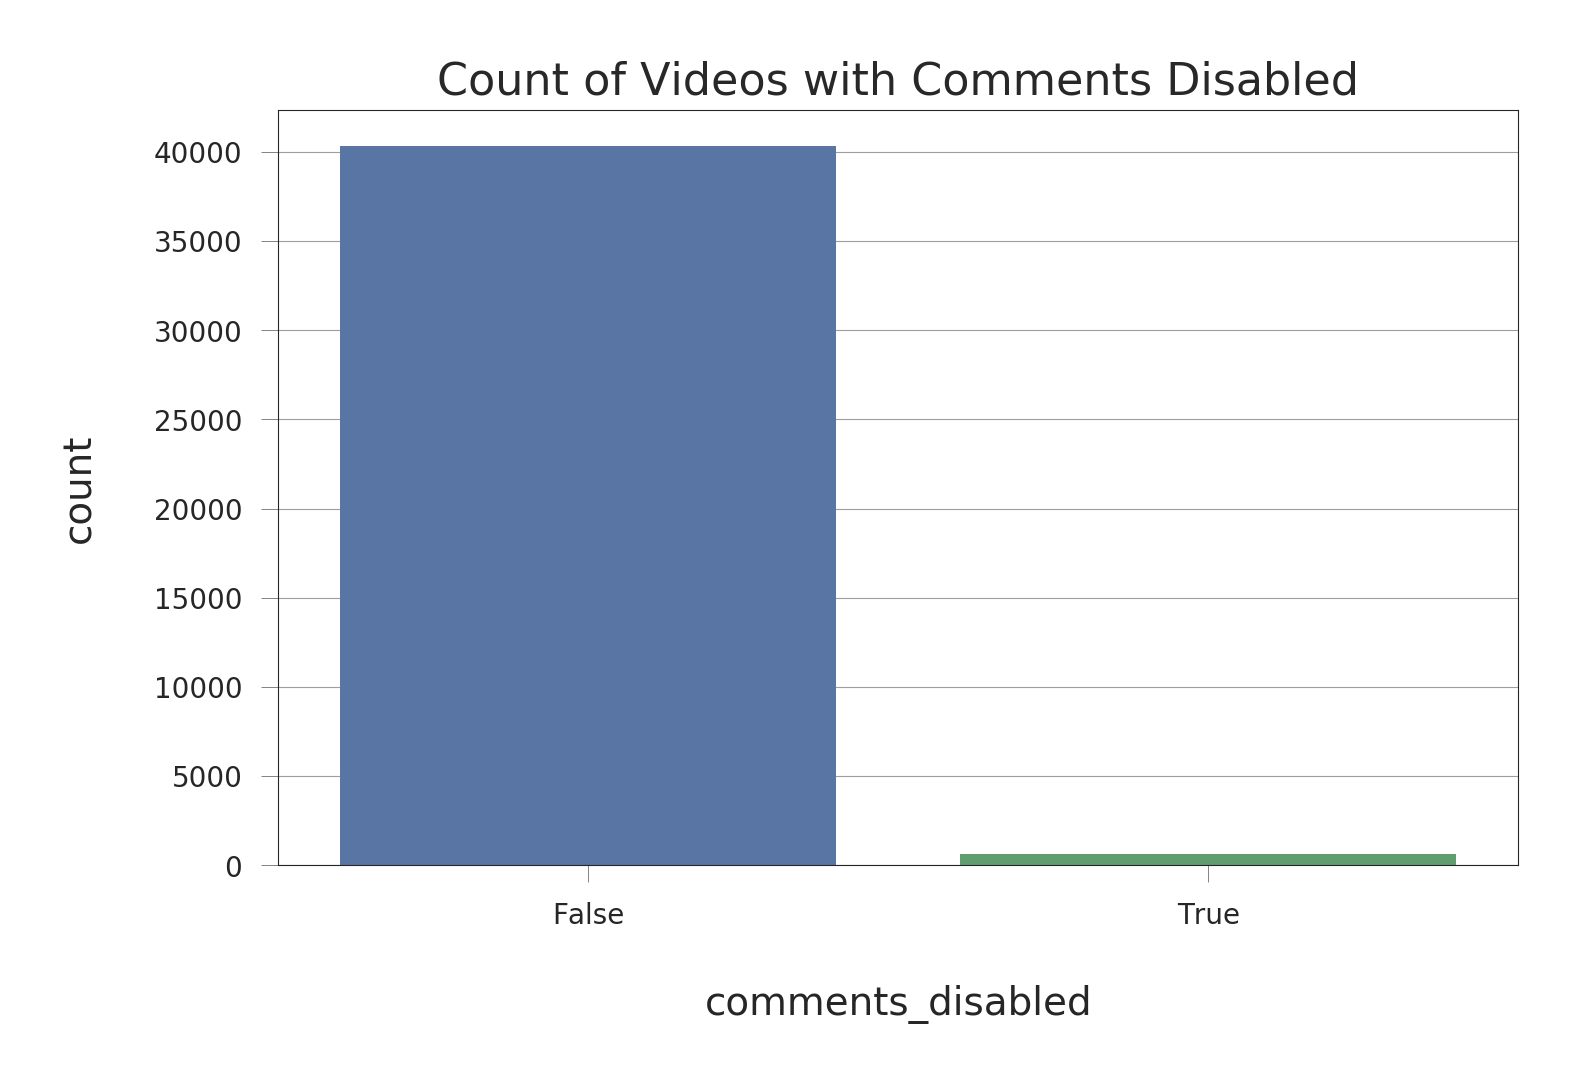

In [29]:
p1 = sns.countplot(x='comments_disabled', data=df)
p1.set_title("Count of Videos with Comments Disabled", fontsize=16);


In [30]:
df['ratings_disabled'].value_counts()

False    40780
True       169
Name: ratings_disabled, dtype: int64

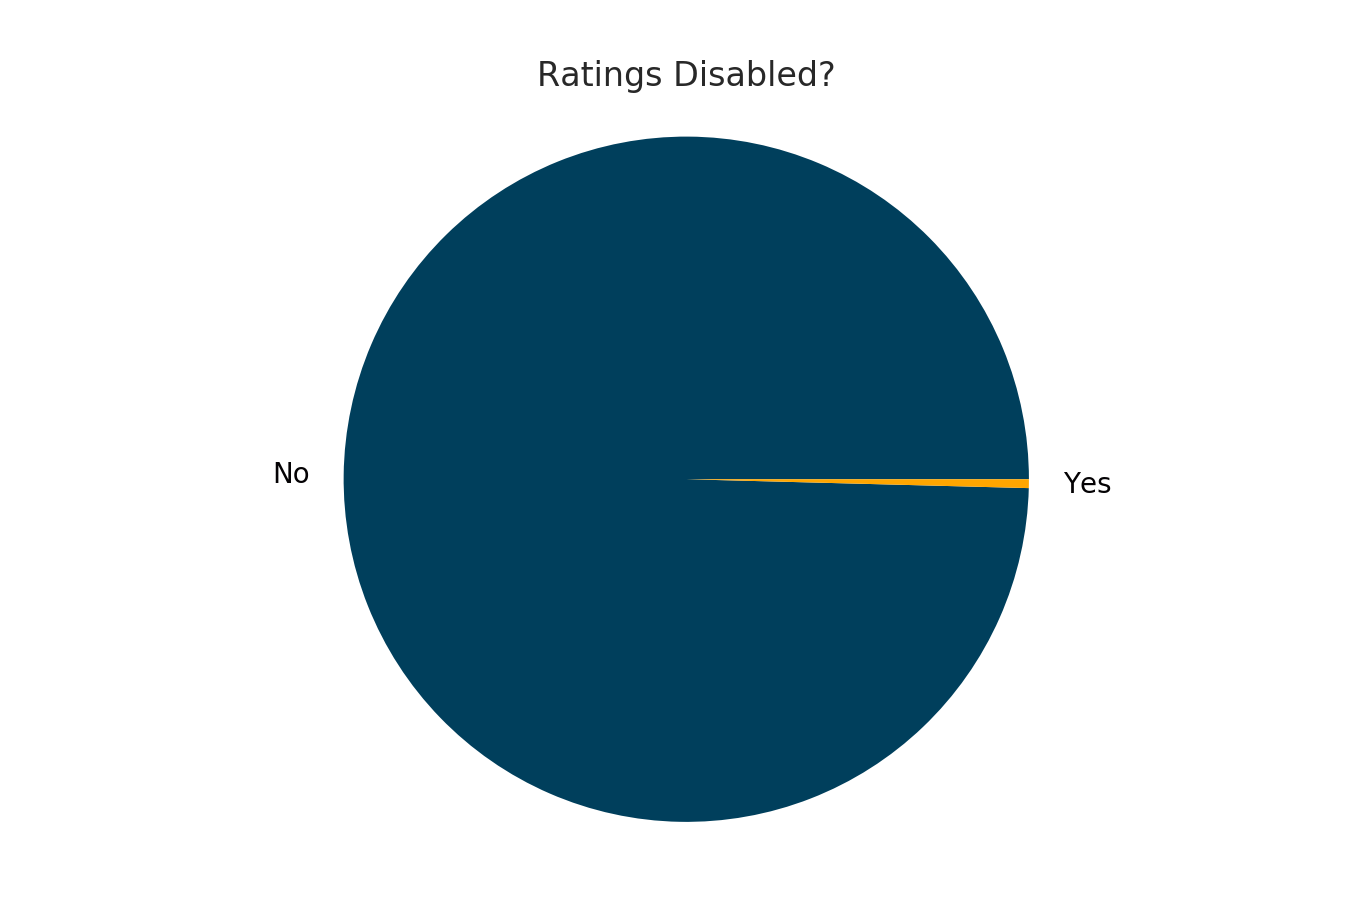

In [31]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Ratings Disabled?');

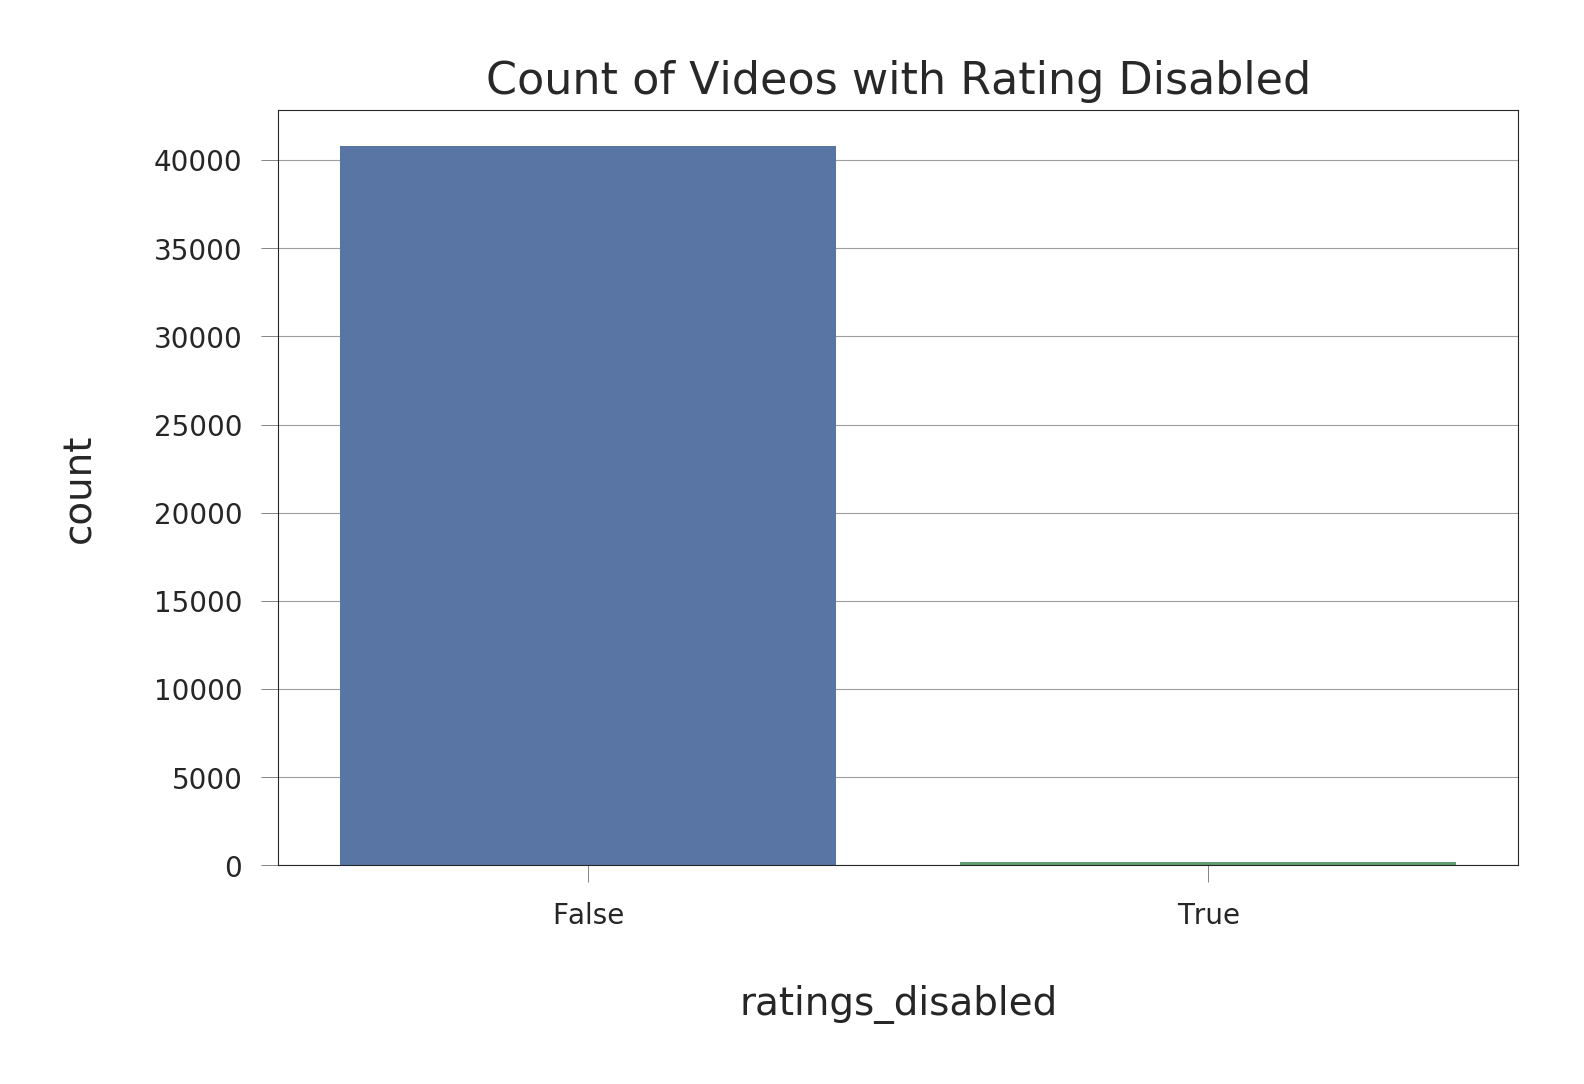

In [32]:
p2 = sns.countplot(x='ratings_disabled', data=df)
p2.set_title("Count of Videos with Rating Disabled", fontsize=16);

In [35]:
print("Videos that have both comments and ratings disabled")
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

Videos that have both comments and ratings disabled


106

In [34]:
df['video_error_or_removed'].value_counts()

False    40926
True        23
Name: video_error_or_removed, dtype: int64

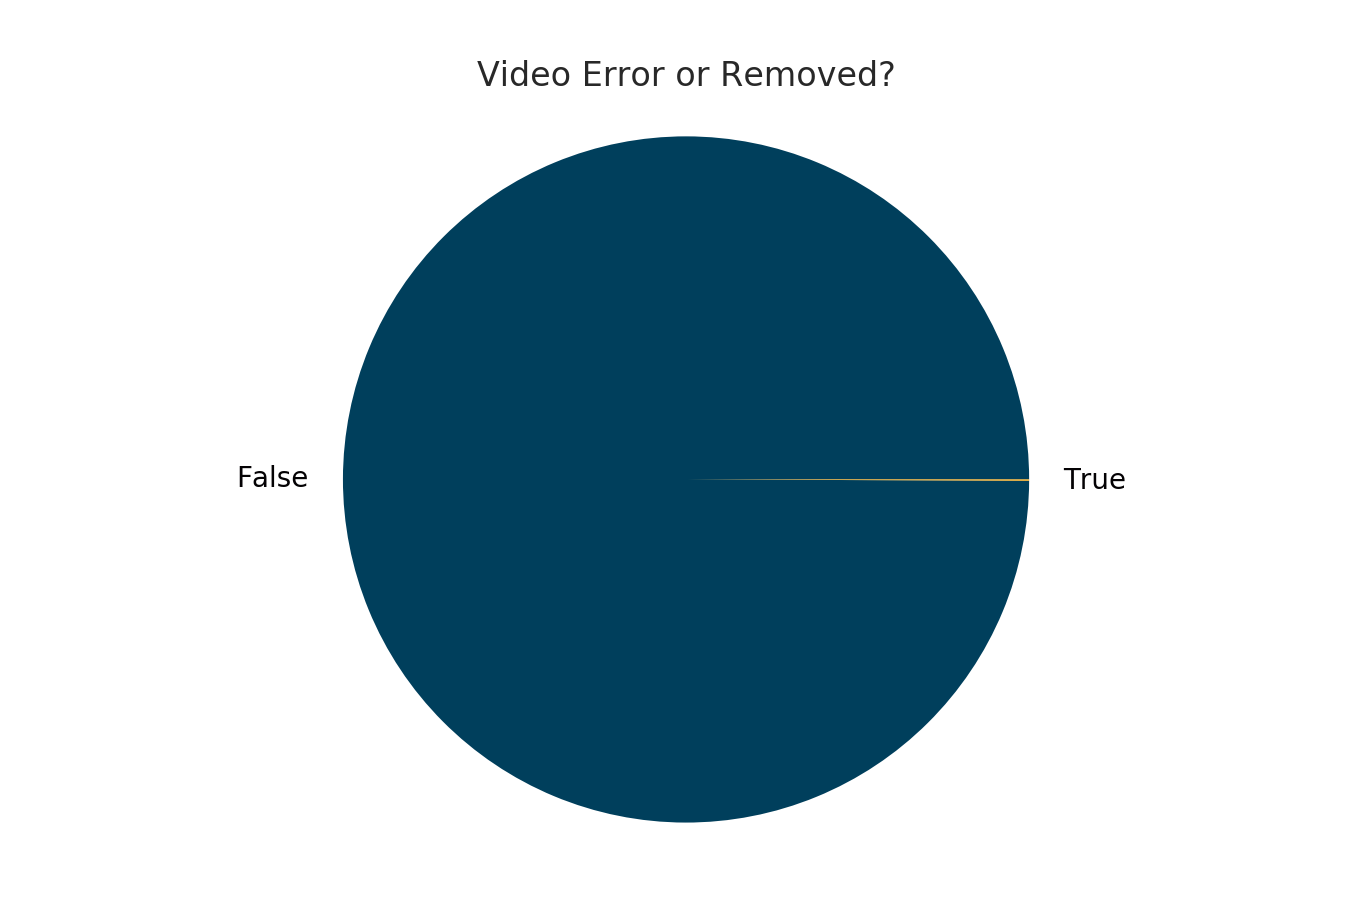

In [36]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['False', 'True'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Video Error or Removed?');

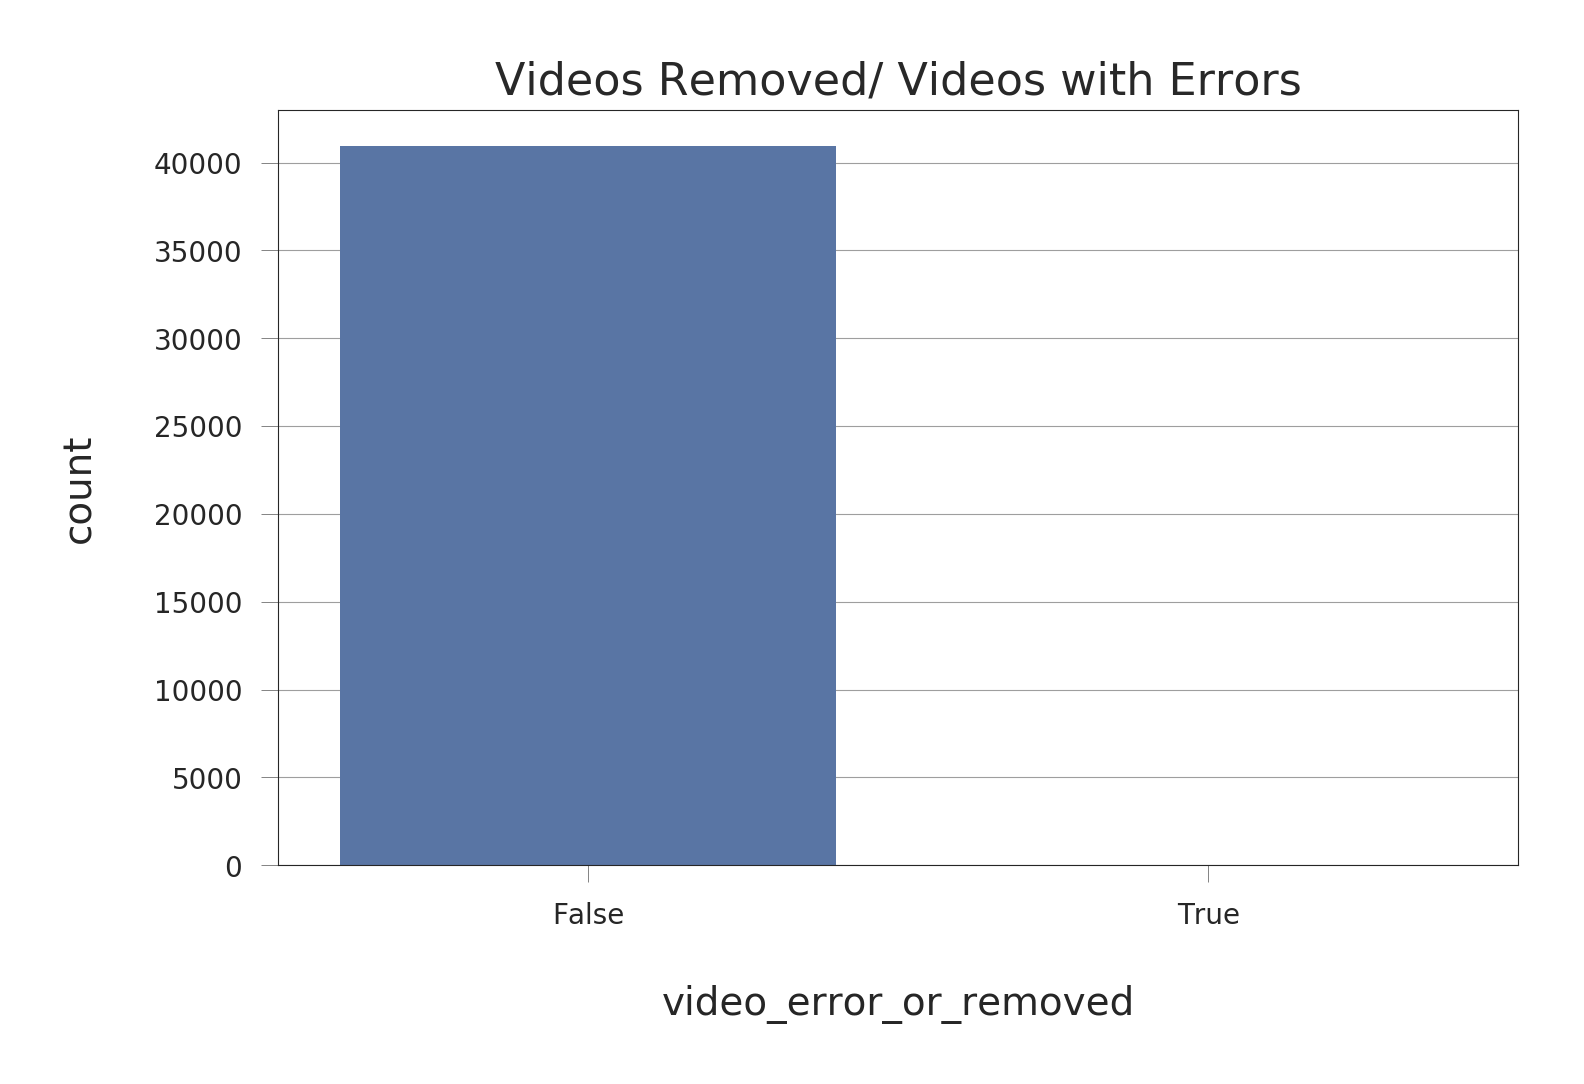

In [37]:
p3 = sns.countplot(x='video_error_or_removed', data=df)
p3.set_title("Videos Removed/ Videos with Errors", fontsize=16);

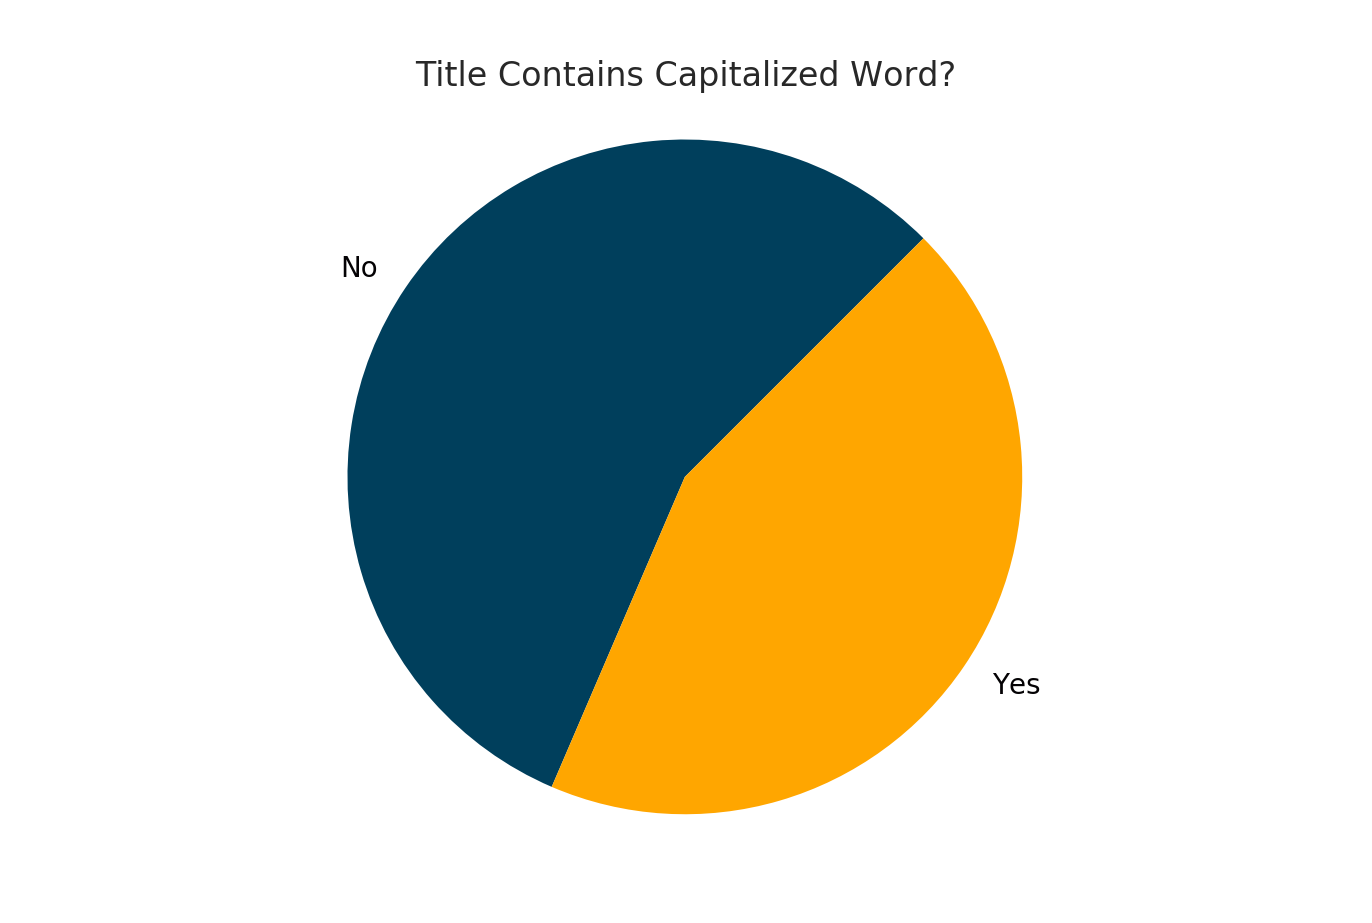

In [38]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
ax.axis('equal')
ax.set_title('Title Contains Capitalized Word?');

In [39]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.56
True    0.44
Name: contains_capitalized, dtype: float64

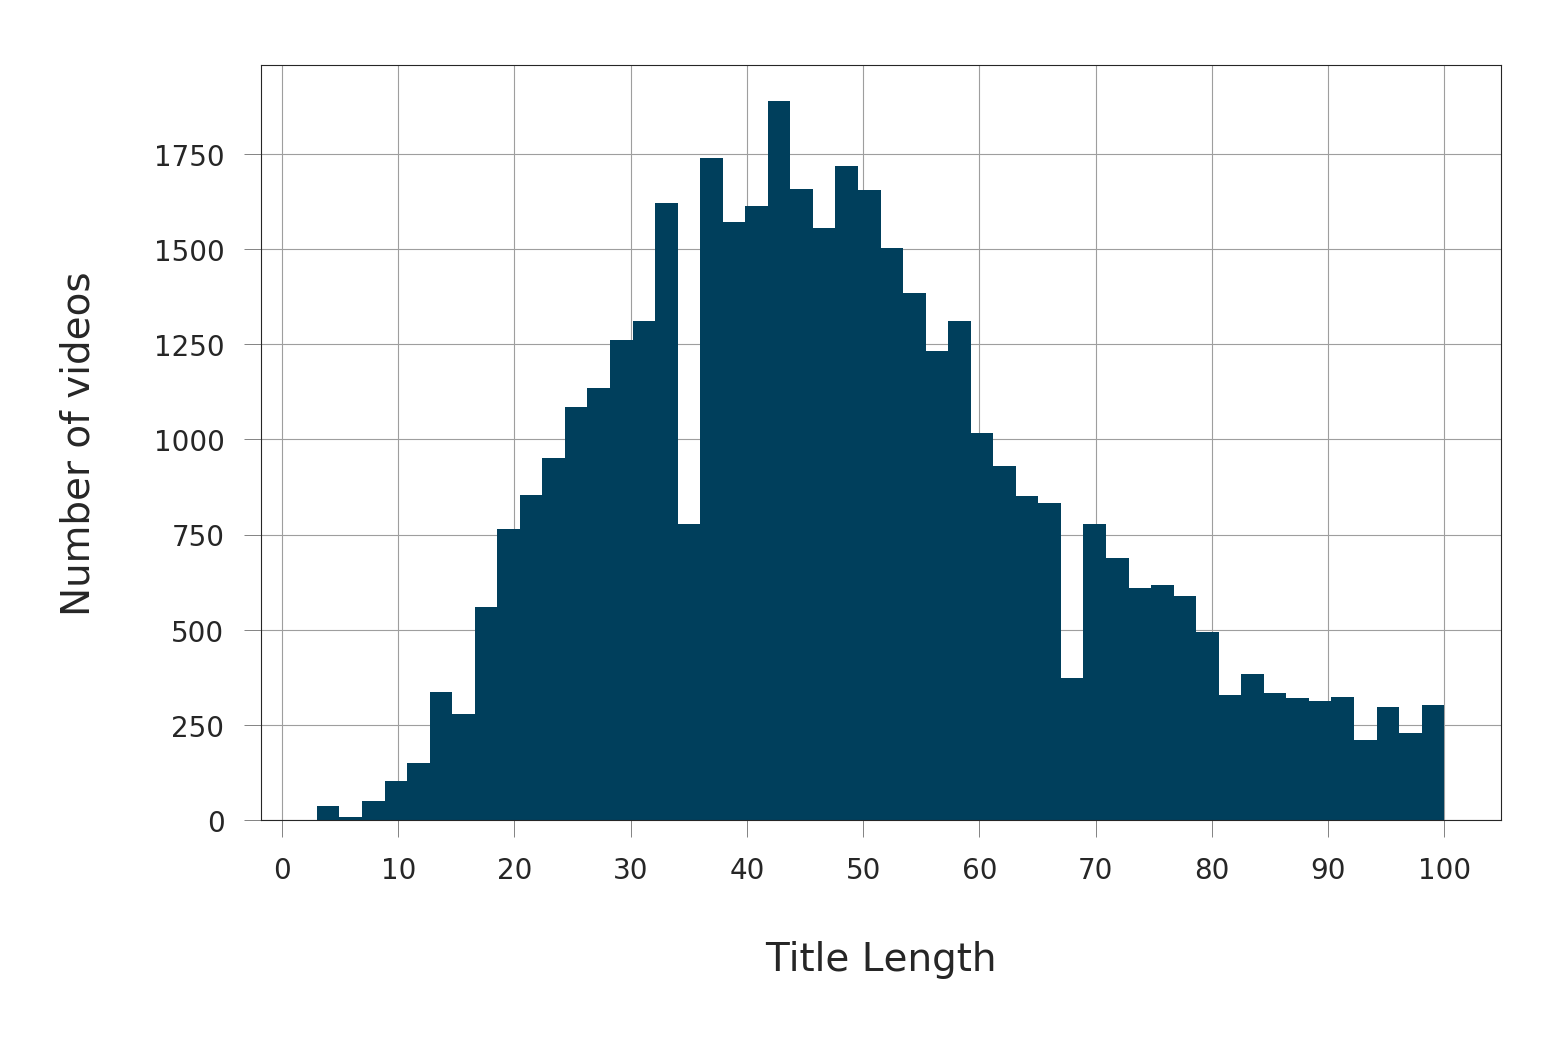

In [40]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
sns.distplot(df["title_length"], kde=False, rug=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
ax.set(xlabel="Title Length", ylabel="Number of videos", xticks=range(0, 110, 10));

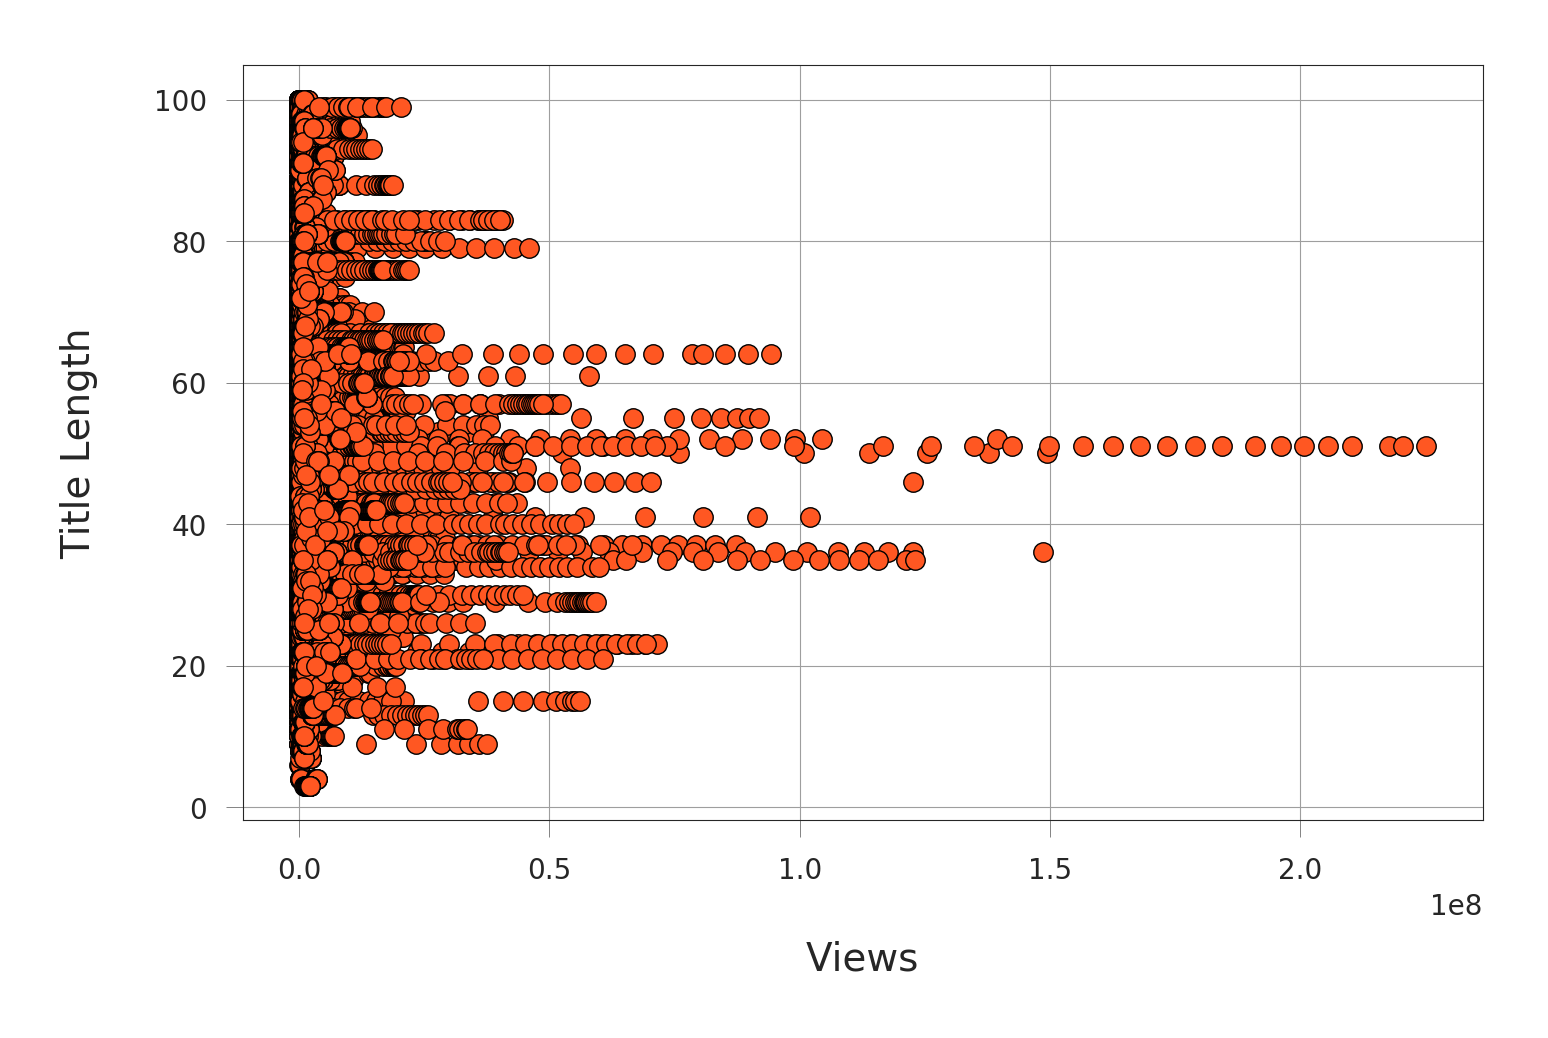

In [41]:
fig, ax = plt.subplots()
ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Title Length");

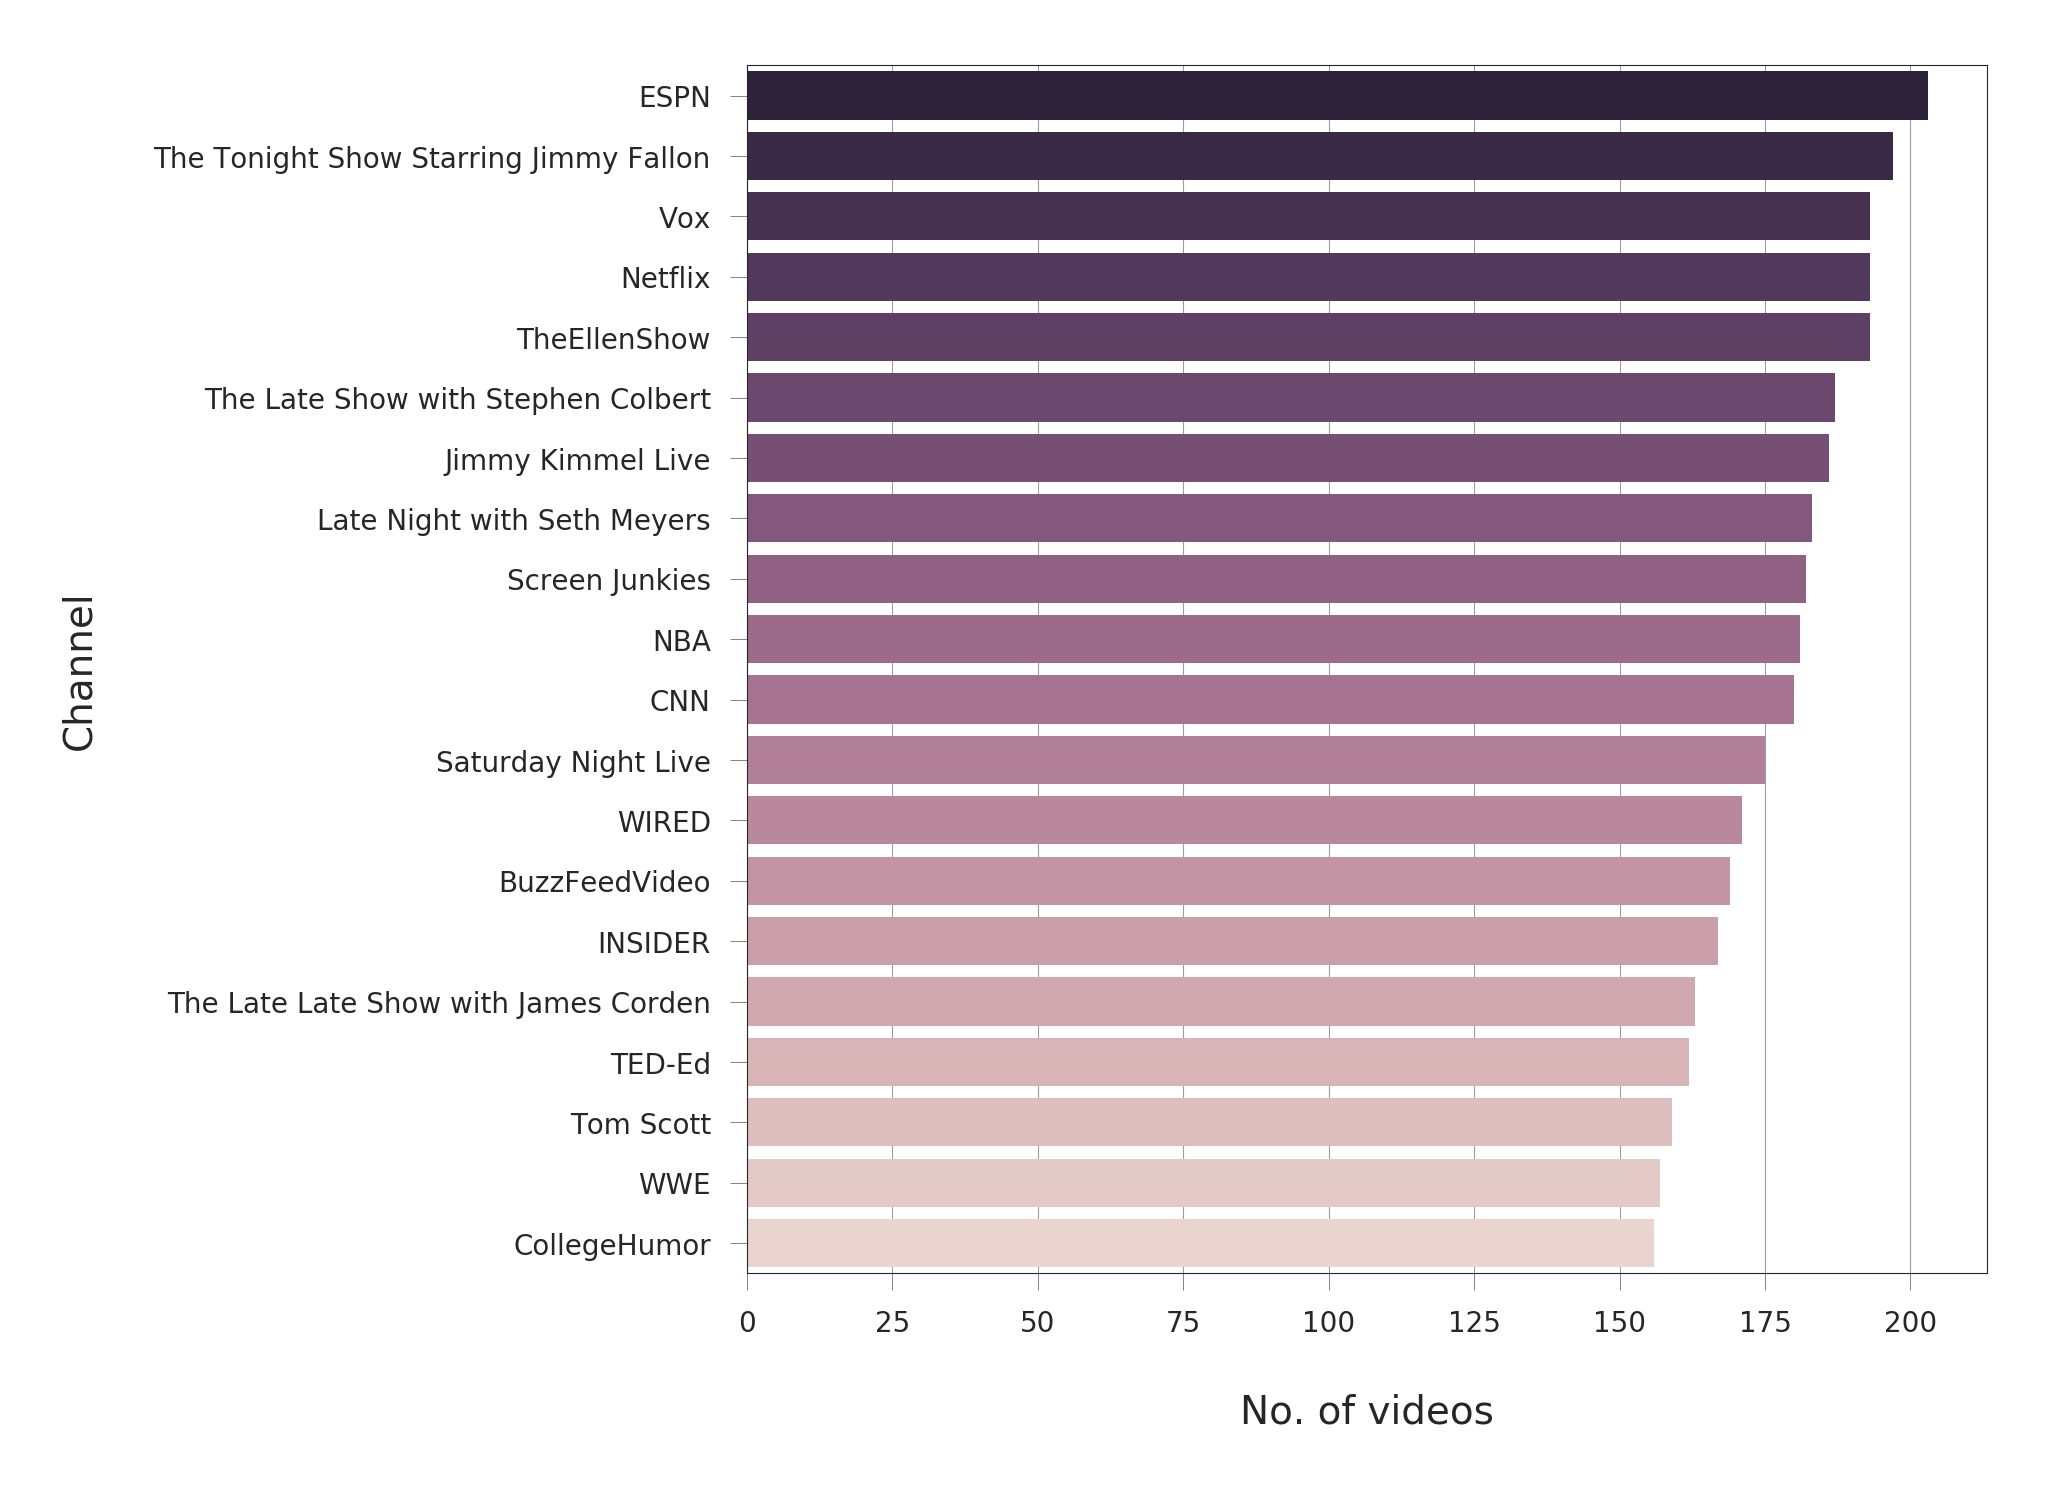

In [42]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x="video_count", y="channel_title", data=cdf, palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
ax.set(xlabel="No. of videos", ylabel="Channel");

In [43]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(5)

[('-', 11452), ('|', 10663), ('The', 5762), ('the', 3610), ('a', 2566)]

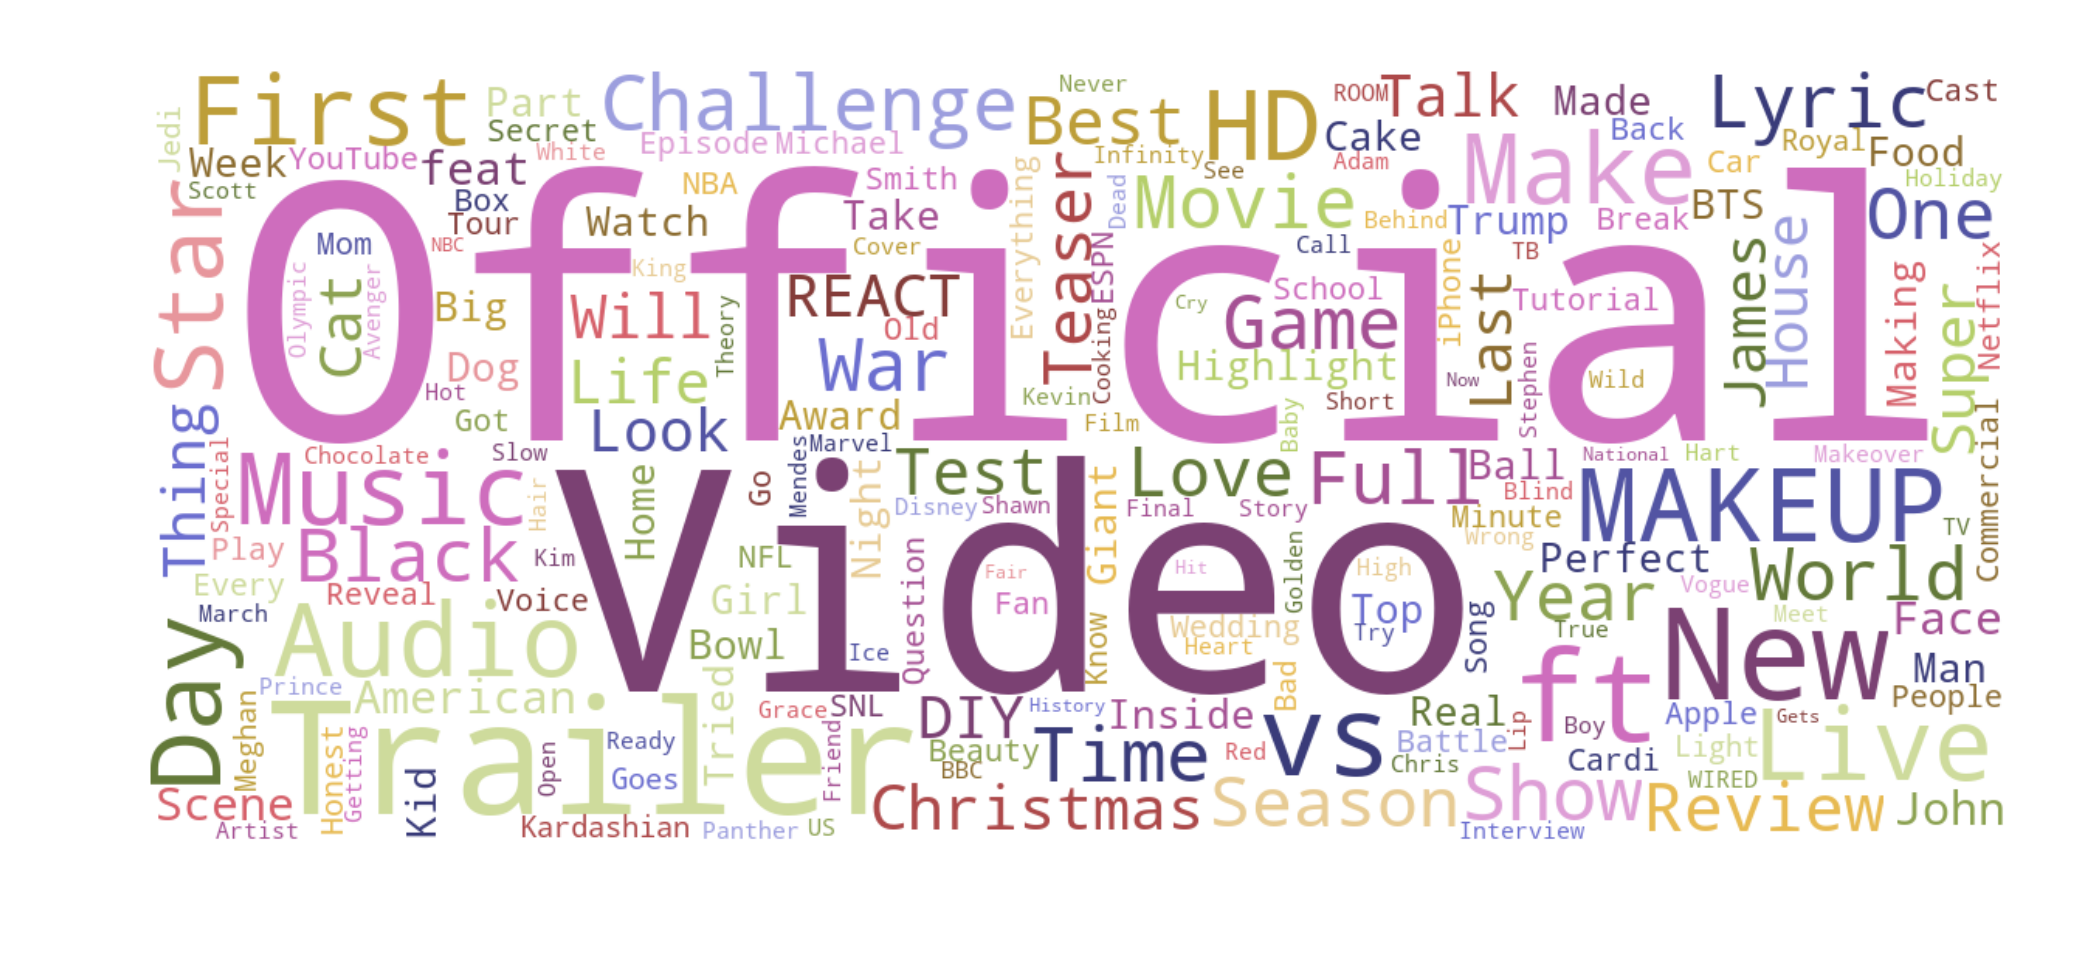

In [44]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

In [45]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

trending_date                                              title  \
video_id                                                                       
0ufNmUyf2co    2018-01-26  Here are the weirdest bikes I own - Freak Bike...   
0ufNmUyf2co    2018-01-27  Here are the weirdest bikes I own - Freak Bike...   
0ufNmUyf2co    2018-01-28                        Bike Check - My freak bikes   
0ufNmUyf2co    2018-01-29                        Bike Check - My freak bikes   
0ufNmUyf2co    2018-01-30                        Bike Check - My freak bikes   
0ufNmUyf2co    2018-01-31                        Bike Check - My freak bikes   

                 channel_title category_id        publish_time  \
video_id                                                         
0ufNmUyf2co  Seth's Bike Hacks          26 2018-01-25 00:00:04   
0ufNmUyf2co  Seth's Bike Hacks          26 2018-01-25 00:00:04   
0ufNmUyf2co  Seth's Bike Hacks          26 2018-01-25 00:00:04   
0ufNmUyf2co  Seth's Bike Hacks          26 2018-01-25 00:00:04   
0ufNmUyf2co  Seth's Bike Hacks          26 2018-01-25 00:00:04   
0ufNmUyf2co  Seth's Bike Hacks          26 2018-01-25 00:00:04   

                                                          tags   views  likes  \
video_id                                                                        
0ufNmUyf2co  bikes|"bicycles"|"weird bikes"|"custom bikes"|...  183149   6969   
0ufNmUyf2co  bikes|"bicycles"|"weird bikes"|"custom bikes"|...  203919   7358   
0ufNmUyf2co  bikes|"bicycles"|"weird bikes"|"custom bikes"|...  216447   7608   
0ufNmUyf2co  bikes|"bicycles"|"weird bikes"|"custom bikes"|...  227005   7754   
0ufNmUyf2co  bikes|"bicycles"|"weird bikes"|"custom bikes"|...  233482   7852   
0ufNmUyf2co  bikes|"bicycles"|"weird bikes"|"custom bikes"|...  238483   7894   

             dislikes  comment_count          ...           category_name  \
video_id                                      ...                           
0ufNmUyf2co        68            824          ...           Howto & Style   
0ufNmUyf2co        72            746          ...           Howto & Style   
0ufNmUyf2co        74            759          ...           Howto & Style   
0ufNmUyf2co        78            759          ...           Howto & Style   
0ufNmUyf2co        78            769          ...           Howto & Style   
0ufNmUyf2co        81            778          ...           Howto & Style   

             likes_log  views_log  dislikes_log comment_log like_rate  \
video_id                                                                
0ufNmUyf2co       8.85      12.12          4.23        6.72      3.81   
0ufNmUyf2co       8.90      12.23          4.29        6.62      3.61   
0ufNmUyf2co       8.94      12.29          4.32        6.63      3.51   
0ufNmUyf2co       8.96      12.33          4.37        6.63      3.42   
0ufNmUyf2co       8.97      12.36          4.37        6.65      3.36   
0ufNmUyf2co       8.97      12.38          4.41        6.66      3.31   

             dislike_rate  comment_rate  title_length  contains_capitalized  
video_id                                                                     
0ufNmUyf2co          0.04          0.45            53                  True  
0ufNmUyf2co          0.04          0.37            53                  True  
0ufNmUyf2co          0.03          0.35            27                 False  
0ufNmUyf2co          0.03          0.33            27                 False  
0ufNmUyf2co          0.03          0.33            27                 False  
0ufNmUyf2co          0.03          0.33            27                 False  

[6 rows x 25 columns]

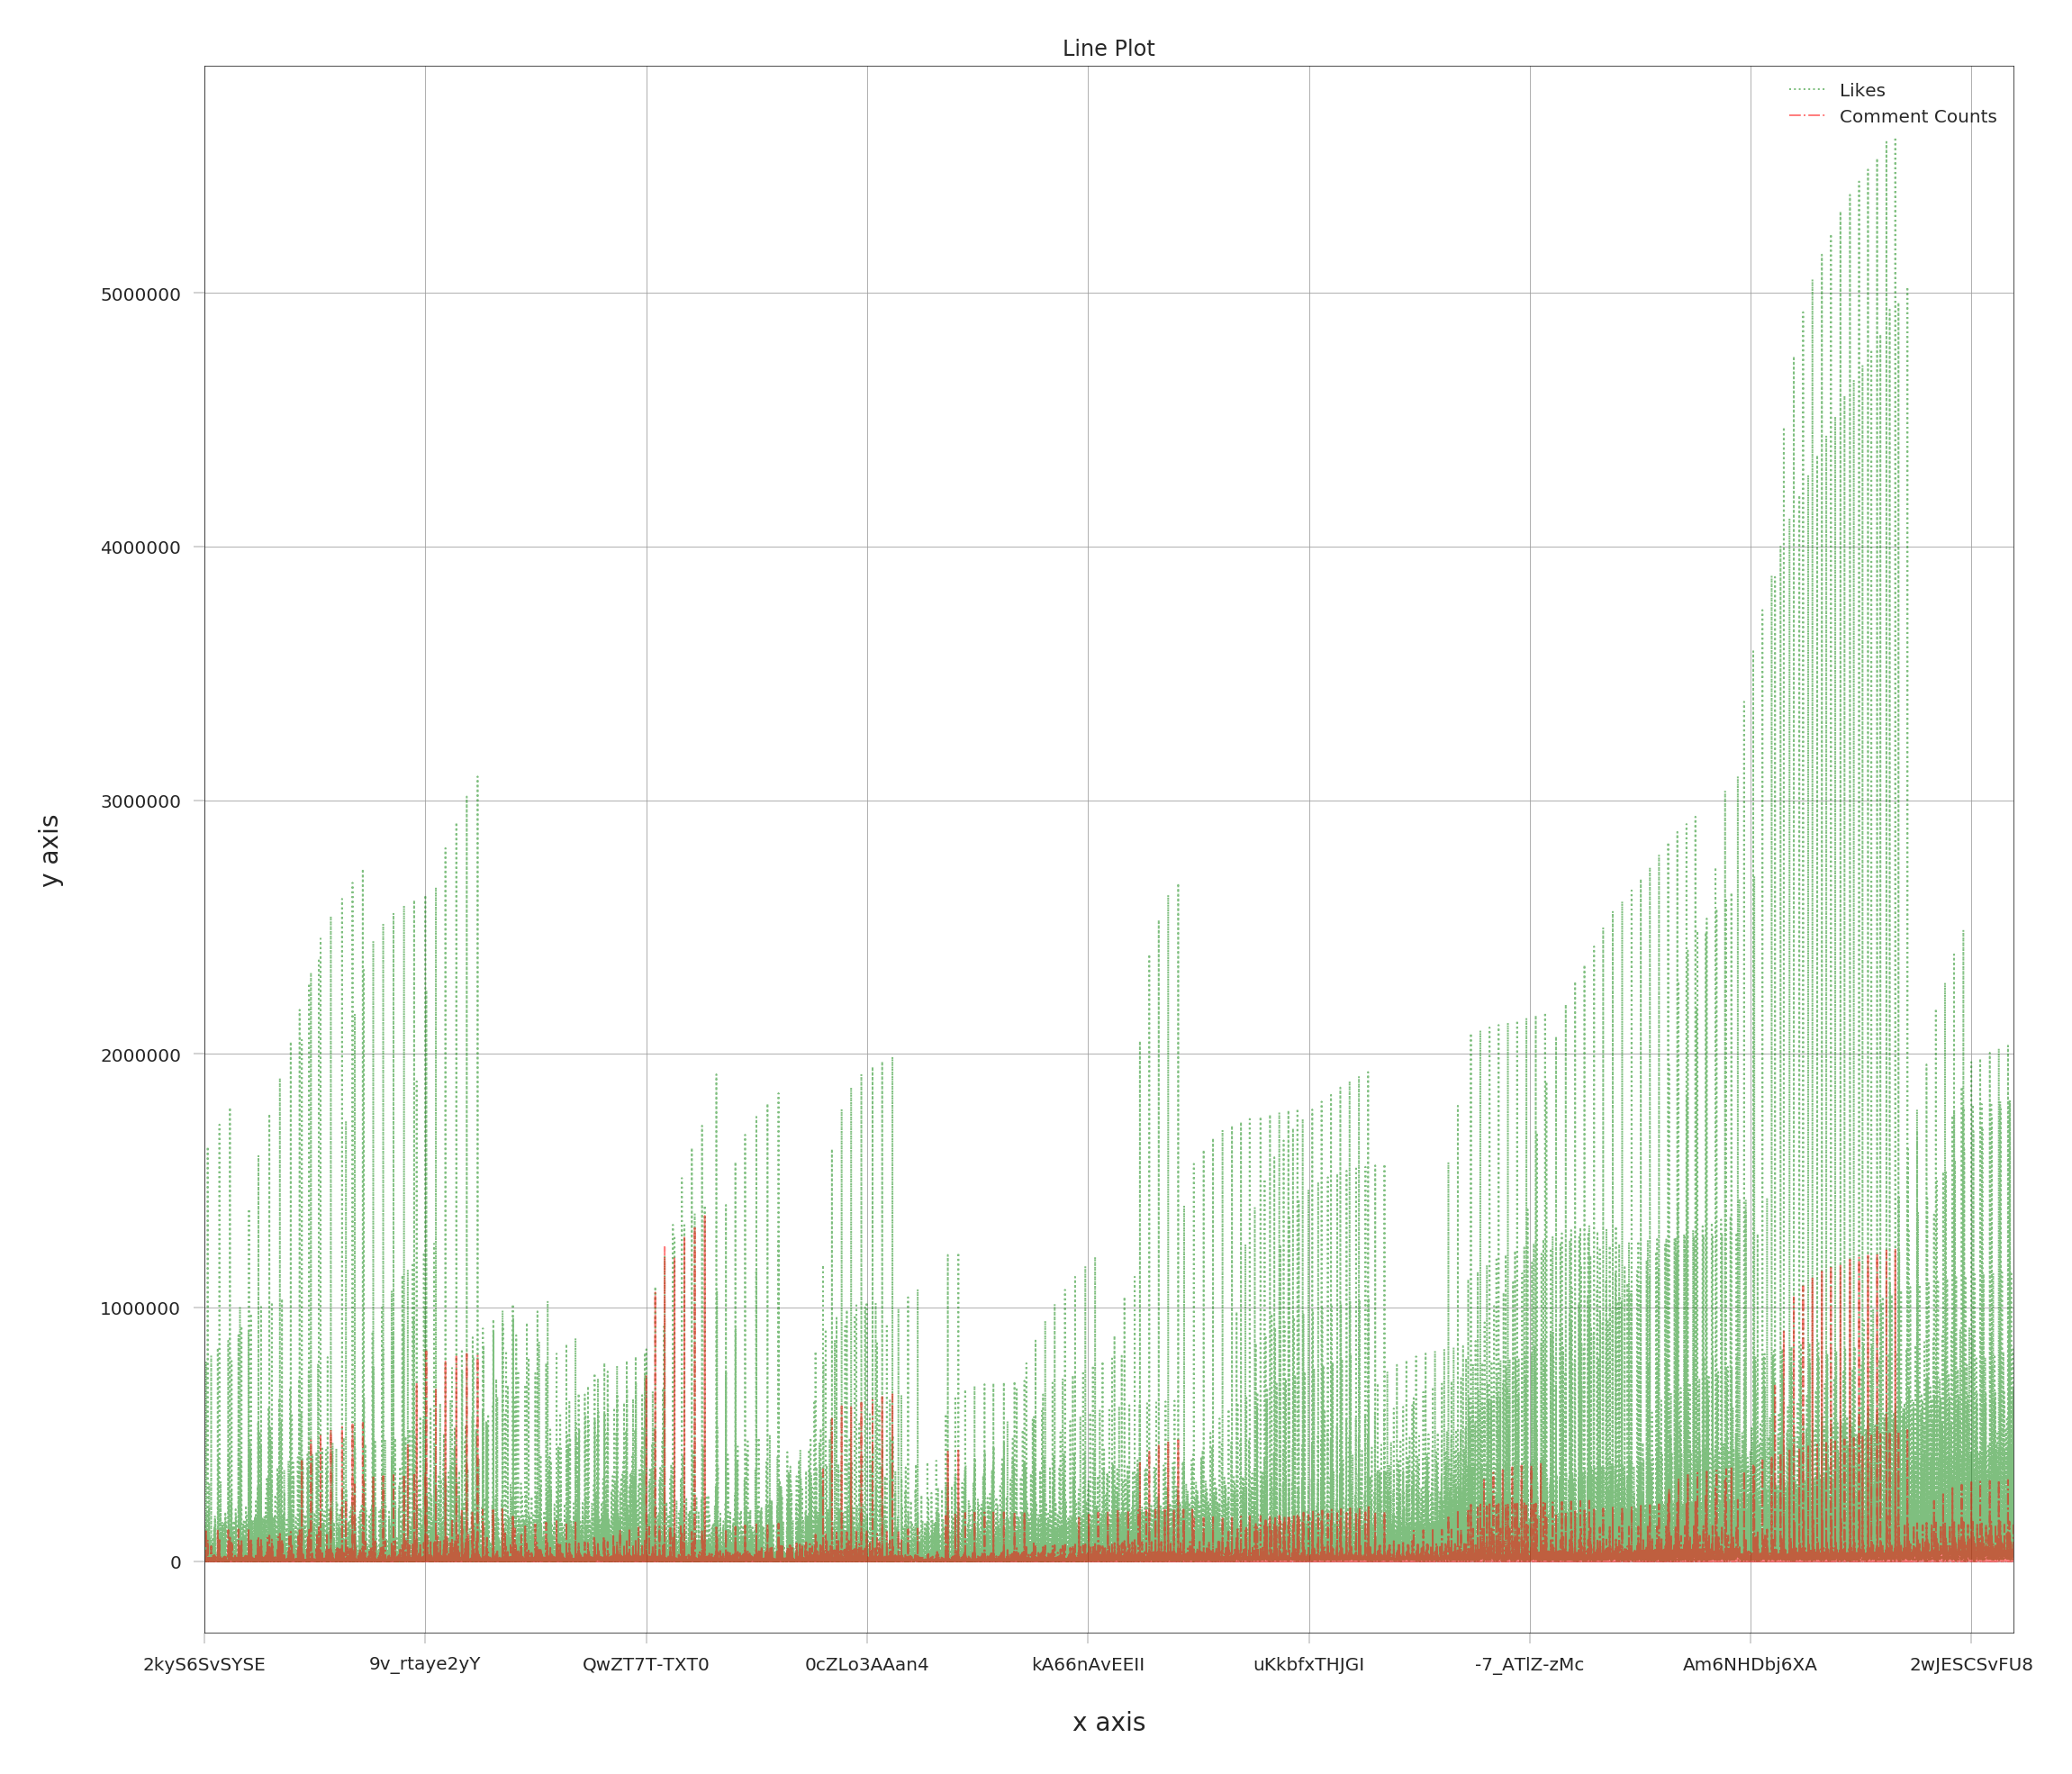

In [61]:
plt.figure(figsize=(18,16))

df.likes.plot(kind = 'line', color = 'g',label = 'Likes',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
df.comment_count.plot(color = 'r',label = 'Comment Counts',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')   
plt.xlabel('x axis')        
plt.ylabel('y axis')
plt.title('Line Plot')      
plt.show();

In [70]:
df.insert(4, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time
df[['publish_date', 'publish_time']].head()

publish_date publish_time
video_id                             
2kyS6SvSYSE   2017-11-13     17:13:01
1ZAPwfrtAFY   2017-11-13     07:30:00
5qpjK5DgCt4   2017-11-12     19:05:24
puqaWrEC7tY   2017-11-13     11:00:04
d380meD0W0M   2017-11-12     18:01:41

SyntaxError: invalid syntax (<ipython-input-74-3dba197e6e96>, line 2)